In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_excel('【ローデータ・GT表】2403運転免許保有者に関する調査.xlsx', sheet_name='基準クリア年齢性別順')
df


#欠損値のある列を確認
null_columns = df.columns[df.isnull().any()]
print(null_columns)

# #欠損値のある行を確認
# df[df.isnull().any(axis=1)]

# print(df.isnull().any())
print(df.isnull().sum())


Index(['q1_snt4_1', 'q2_snt4_1', 'q6', 'q7', 'q8', 'q9', 'q10'], dtype='object')
no        0
group1    0
group2    0
sc1       0
sc2_1     0
         ..
cq-2      0
dq-1      0
dq-2      0
eq-1      0
eq-2      0
Length: 258, dtype: int64


In [22]:

# sc5列の作成: 各行で'1'がある位置に応じて0, 1, 2に変換
df['sc5'] = df[['sc5-1', 'sc5-2', 'sc5-3']].idxmax(axis=1)

# 'sc5-1', 'sc5-2', 'sc5-3'を数値に変換
df['sc5'] = df['sc5'].map({'sc5-1': 0, 'sc5-2': 1, 'sc5-3': 2})

# 元のsc5-1, sc5-2, sc5-3の列を削除（不要なら）
df = df.drop(columns=['sc5-1', 'sc5-2', 'sc5-3'])

#sc7列の作成'sc7-1'~'sc7-23'
df['sc7'] = df[['sc7-1', 'sc7-2', 'sc7-3', 'sc7-4', 'sc7-5', 'sc7-6', 'sc7-7', 'sc7-8', 'sc7-9', 'sc7-10', 'sc7-11', 'sc7-12', 'sc7-13', 'sc7-14', 'sc7-15', 'sc7-16', 'sc7-17', 'sc7-18', 'sc7-19', 'sc7-20', 'sc7-21', 'sc7-22', 'sc7-23']].idxmax(axis=1)

# 'sc7-1', 'sc7-2', 'sc7-3', 'sc7-4', 'sc7-5', 'sc7-6', 'sc7-7', 'sc7-8', 'sc7-9', 'sc7-10', 'sc7-11', 'sc7-12', 'sc7-13', 'sc7-14', 'sc7-15', 'sc7-16', 'sc7-17', 'sc7-18', 'sc7-19', 'sc7-20', 'sc7-21', 'sc7-22', 'sc7-23'を数値に変換
df['sc7'] = df['sc7'].map({'sc7-1': 0, 'sc7-2': 1, 'sc7-3': 2, 'sc7-4': 3, 'sc7-5': 4, 'sc7-6': 5, 'sc7-7': 6, 'sc7-8': 7, 'sc7-9': 8, 'sc7-10': 9, 'sc7-11': 10, 'sc7-12': 11, 'sc7-13': 12, 'sc7-14': 13, 'sc7-15': 14, 'sc7-16': 15, 'sc7-17': 16, 'sc7-18': 17, 'sc7-19': 18, 'sc7-20': 19, 'sc7-21': 20, 'sc7-22': 21, 'sc7-23': 22})

# 元のsc7-1, sc7-2, sc7-3, sc7-4, sc7-5, sc7-6, sc7-7, sc7-8, sc7-9, sc7-10, sc7-11, sc7-12, sc7-13, sc7-14, sc7-15, sc7-16, sc7-17, sc7-18, sc7-19, sc7-20, sc7-21, sc7-22, sc7-23の列を削除（不要なら）
df = df.drop(columns=['sc7-1', 'sc7-2', 'sc7-3', 'sc7-4', 'sc7-5', 'sc7-6', 'sc7-7', 'sc7-8', 'sc7-9', 'sc7-10', 'sc7-11', 'sc7-12', 'sc7-13', 'sc7-14', 'sc7-15', 'sc7-16', 'sc7-17', 'sc7-18', 'sc7-19', 'sc7-20', 'sc7-21', 'sc7-22', 'sc7-23'])

In [23]:
#欠損値のある列を確認
null_columns = df.columns[df.isnull().any()]
print(null_columns)


Index(['q1_snt4_1', 'q2_snt4_1', 'q6', 'q7', 'q8', 'q9', 'q10'], dtype='object')


In [24]:
df.drop(['no','group1','group2','sc8','q1_snt4_1','q2_snt4_1','q6', 'q7', 'q8', 'q9', 'q10'],axis=1,inplace=True)
df.columns

Index(['sc1', 'sc2_1', 'sc3', 'sc4', 'sc6', 'q1', 'q2', 'q3', 'q4', 'q4sq',
       ...
       'bq-1', 'bq-2', 'cq-1', 'cq-2', 'dq-1', 'dq-2', 'eq-1', 'eq-2', 'sc5',
       'sc7'],
      dtype='object', length=223)

In [25]:
#aq50,aq51_1~aq51_20,bq50,bq51_1~bq51_20,cq50,cq51_1~cq51_20,dq50,dq51_1~dq51_20,eq50,eq51_1~eq51_20の列を削除
df.drop(['aq50','aq51_1','aq51_2','aq51_3','aq51_4','aq51_5','aq51_6','aq51_7','aq51_8','aq51_9','aq51_10','aq51_11','aq51_12','aq51_13','aq51_14','aq51_15','aq51_16','aq51_17','aq51_18','aq51_19','aq51_20','bq50','bq51_1','bq51_2','bq51_3','bq51_4','bq51_5','bq51_6','bq51_7','bq51_8','bq51_9','bq51_10','bq51_11','bq51_12','bq51_13','bq51_14','bq51_15','bq51_16','bq51_17','bq51_18','bq51_19','bq51_20','cq50','cq51_1','cq51_2','cq51_3','cq51_4','cq51_5','cq51_6','cq51_7','cq51_8','cq51_9','cq51_10','cq51_11','cq51_12','cq51_13','cq51_14','cq51_15','cq51_16','cq51_17','cq51_18','cq51_19','cq51_20','dq50','dq51_1','dq51_2','dq51_3','dq51_4','dq51_5','dq51_6','dq51_7','dq51_8','dq51_9','dq51_10','dq51_11','dq51_12','dq51_13','dq51_14','dq51_15','dq51_16','dq51_17','dq51_18','dq51_19','dq51_20','eq50','eq51_1','eq51_2','eq51_3','eq51_4','eq51_5','eq51_6','eq51_7','eq51_8','eq51_9','eq51_10','eq51_11','eq51_12','eq51_13','eq51_14','eq51_15','eq51_16','eq51_17','eq51_18','eq51_19','eq51_20'],axis=1,inplace=True)

In [26]:
df.rename(columns={'sc1':'性別','sc2_1':'年齢','sc3':'住まい','sc4':'結婚フラグ','sc5':'子供フラグ','sc6':'職業','sc7':'業種','q1':'回答機器','q2':'回答音響機器','q3':'回答時周辺状況','q4':'免許種類','q4sq':'免許取得時期','q5':'運転頻度','q5sq':'最後運転時期'},inplace=True)

In [27]:
df

性別  年齢  住まい  結婚フラグ  職業  回答機器  回答音響機器  回答時周辺状況  免許種類  免許取得時期  ...  bq-1  \
0     1  28   14      1   1     1       2        1     2       4  ...     1   
1     1  28    1      2   1     2       1        4     2       4  ...     1   
2     1  28   11      2   9     1       1        3     2       4  ...     1   
3     1  20   21      1  12     2       1        1     1       2  ...     1   
4     1  27   13      2  11     1       1        1     1       4  ...     1   
..   ..  ..  ...    ...  ..   ...     ...      ...   ...     ...  ...   ...   
799   2  72   40      2  10     1       1        2     2       5  ...     1   
800   2  71   13      2  11     3       1        1     2       5  ...     1   
801   2  72   13      2  10     2       3        2     2       5  ...     1   
802   2  75   43      2  11     1       1        1     2       5  ...     1   
803   2  75   28      2  11     1       4        1     2       5  ...     1   

     bq-2  cq-1  cq-2  dq-1  dq-2  eq-1  eq-2  子供フラグ  業種  
0       0     1     0     1     0     1     0      2   6  
1       0     1     0     1     0     1     0      0   0  
2       0     1     0     1     0     1     0      0  18  
3       0     1     0     1     0     1     0      2  14  
4       0     1     0     1     0     1     0      2   7  
..    ...   ...   ...   ...   ...   ...   ...    ...  ..  
799     0     1     0     1     0     1     0      0  22  
800     0     1     0     1     0     1     0      1  22  
801     0     1     0     1     0     1     0      2  22  
802     0     1     0     1     0     1     0      1  22  
803     0     1     0     1     0     1     0      1  22  

[804 rows x 118 columns]

In [28]:
pref = pd.read_csv('好み不快個人的に好き.csv')
pref

提示なし  画像のみ  音声のみ  画像＋報知音  画像+音声
0       6     9    11      10      9
1       9     9     9       9      9
2       7     7     7       7     10
3       9    10    11      10     11
4       3    14    14      11     15
..    ...   ...   ...     ...    ...
799    11     9    11      11     11
800     7     6     9       8      7
801    11    11    11      11     11
802     7    12    12      10     12
803     7    10    11      11     11

[804 rows x 5 columns]

In [42]:
# #lightgbmのインストール
# !pip install lightgbm
# optunaのインストール
# !pip install optuna
#!pip install optuna-integration

#lightgbmのインポート
# import lightgbm as lgb
import optuna.integration.lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# データの準備
X = df  # 特徴量データ
y = pref  # 回帰対象（5つのターゲット）

# それぞれのターゲットに対して回帰モデルを作成
models = []
predictions = []
mse_scores = []
eval_results = []  # 各モデルの学習結果を保存

# 各ターゲットについて回帰
for i in range(y.shape[1]):
    # データの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, i], test_size=0.2, random_state=0)

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # パラメータを設定
    params = {
        'objective': 'regression',  # 回帰問題
        'metric': 'mean_squared_error',
        'feature_fraction': 0.5,  # 学習に使用する特徴量の割合
    }

    
    

    # 学習
    evaluation_results = {}  # 結果を保存する辞書
    verbose_eval = 0  # 表示を非表示にする
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], 
                      num_boost_round=1000,  
                      callbacks=[
                        lgb.early_stopping(stopping_rounds=10, verbose=True),
                        lgb.log_evaluation(verbose_eval),
                        lgb.record_evaluation(evaluation_results)])

    # モデルを保存
    models.append(model)

    # 学習曲線のデータを保存
    eval_results.append(evaluation_results)

    # 予測
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    predictions.append(y_pred)

    # MSEを計算
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f'Target {i+1} MSE:', mse)

print('MSE:', mse_scores)

# 平均MSEを表示
mean_mse = np.mean(mse_scores)
print('Mean MSE for all targets:', mean_mse)

# # 学習曲線のプロット
# for i in range(y.shape[1]):
#     results = eval_results[i]
    
#     # 学習データと検証データの損失（MSE）をプロット
#     plt.figure(figsize=(10, 6))
#     plt.plot(results['training']['l2'], label='Training Loss')
#     plt.plot(results['valid_1']['l2'], label='Validation Loss')
#     plt.title(f'Target {i+1} Learning Curve')
#     plt.xlabel('Iterations')
#     plt.ylabel('MSE')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


[I 2024-09-13 14:23:15,019] A new study created in memory with name: no-name-b7cda958-88ad-423e-9c80-8b59e183b1c6
feature_fraction, val_score: 4.613017: 100%|##########| 7/7 [00:00<00:00, 37.53it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 4.613017:  35%|###5      | 7/20 [00:00<00:00, 41.86it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:15,425] Trial 14 finished with value: 4.613017341636339 and parameters: {'num_leaves': 191}. Best is trial 7 with value: 4.613017341636339.
num_leaves, val_score: 4.576667:  70%|#######   | 14/20 [00:00<00:00, 34.98it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[10]	valid_0's l2: 3.28321	valid_1's l2: 4.57667
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation

[I 2024-09-13 14:23:15,631] Trial 21 finished with value: 4.613017341636339 and parameters: {'num_leaves': 113}. Best is trial 15 with value: 4.576666716376689.
num_leaves, val_score: 4.576667: 100%|##########| 20/20 [00:00<00:00, 35.30it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

bagging, val_score: 4.549381:  10%|#         | 1/10 [00:00<00:00, 17.84it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:15,836] Trial 28 finished with value: 4.549381049035926 and parameters: {'bagging_fraction': 0.9927014086853223, 'bagging_freq': 7}. Best is trial 28 with value: 4.549381049035926.
bagging, val_score: 4.549381:  60%|######    | 6/10 [00:00<00:00, 34.34it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[5]	valid_0's l2: 3.94543	valid_1's l2: 4.57705
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation 

[I 2024-09-13 14:23:15,986] Trial 33 finished with value: 4.5786034564665545 and parameters: {'bagging_fraction': 0.9896230920098067, 'bagging_freq': 7}. Best is trial 28 with value: 4.549381049035926.
bagging, val_score: 4.549381:  80%|########  | 8/10 [00:00<00:00, 32.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:16,053] Trial 35 finished with value: 4.6626823552765755 and parameters: {'bagging_fraction': 0.8086261001981719, 'bagging_freq': 5}. Best is trial 28 with value: 4.549381049035926.
bagging, val_score: 4.549381: 100%|##########| 10/10 [00:00<00:00, 32.46it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[2]	valid_0's l2: 4.51386	valid_1's l2:

feature_fraction_stage2, val_score: 4.549381:  50%|#####     | 3/6 [00:00<00:00, 31.58it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.16352	valid_1's l2: 4.66093
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation 

[I 2024-09-13 14:23:16,186] Trial 40 finished with value: 4.596695347788811 and parameters: {'feature_fraction': 0.7200000000000001}. Best is trial 38 with value: 4.581154687560456.
feature_fraction_stage2, val_score: 4.549381: 100%|##########| 6/6 [00:00<00:00, 41.97it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 3.80095	valid_1's l2: 4.5742
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	va

regularization_factors, val_score: 4.524068:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[4]	valid_0's l2: 4.16525	valid_1's l2: 4.52407


[I 2024-09-13 14:23:16,287] Trial 43 finished with value: 4.524067840476687 and parameters: {'lambda_l1': 0.09609253458459613, 'lambda_l2': 0.07998513081127662}. Best is trial 43 with value: 4.524067840476687.
regularization_factors, val_score: 4.524068:  15%|#5        | 3/20 [00:00<00:00, 23.80it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.17111	valid_1's l2: 4.56429
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

[I 2024-09-13 14:23:16,393] Trial 46 finished with value: 4.544025504613779 and parameters: {'lambda_l1': 0.21154088621641726, 'lambda_l2': 0.3366540160321473}. Best is trial 43 with value: 4.524067840476687.
regularization_factors, val_score: 4.524068:  25%|##5       | 5/20 [00:00<00:00, 23.80it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.17463	valid_1's l2: 4.54401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

[I 2024-09-13 14:23:16,455] Trial 48 finished with value: 4.546224159256667 and parameters: {'lambda_l1': 0.2780616470510428, 'lambda_l2': 0.44377876228225516}. Best is trial 43 with value: 4.524067840476687.
regularization_factors, val_score: 4.524068:  35%|###5      | 7/20 [00:00<00:00, 28.63it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.17652	valid_1's l2: 4.54588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

[I 2024-09-13 14:23:16,516] Trial 50 finished with value: 4.564219107337278 and parameters: {'lambda_l1': 0.21095116097311037, 'lambda_l2': 0.2081338006598774}. Best is trial 43 with value: 4.524067840476687.
regularization_factors, val_score: 4.524068:  50%|#####     | 10/20 [00:00<00:00, 28.63it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.178	valid_1's l2: 4.54622
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits wit

regularization_factors, val_score: 4.524068:  60%|######    | 12/20 [00:00<00:00, 30.68it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[6]	valid_0's l2: 3.86853	valid_1's l2: 4.53006


regularization_factors, val_score: 4.524068:  70%|#######   | 14/20 [00:00<00:00, 30.68it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.14844	valid_1's l2: 4.54939
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

regularization_factors, val_score: 4.524068:  85%|########5 | 17/20 [00:00<00:00, 31.16it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:16,825] Trial 60 finished with value: 4.564588851931191 and parameters: {'lambda_l1': 4.0728115850967507e-07, 'lambda_l2': 8.91661503265582}. Best is trial 43 with value: 4.524067840476687.
regularization_factors, val_score: 4.524068:  90%|######### | 18/20 [00:00<00:00, 31.16it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673


regularization_factors, val_score: 4.524068: 100%|##########| 20/20 [00:00<00:00, 30.71it/s]


[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.15474	valid_1's l2: 4.53651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[4]	valid_0's l2: 4.1491	valid_1's l2: 4.54946


min_child_samples, val_score: 4.524068:  20%|##        | 1/5 [00:00<00:00, 25.35it/s][I 2024-09-13 14:23:16,931] Trial 64 finished with value: 4.59376164324192 and parameters: {'min_child_samples': 100}. Best is trial 64 with value: 4.59376164324192.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

min_child_samples, val_score: 4.524068: 100%|##########| 5/5 [00:00<00:00, 47.16it/s]
[I 2024-09-13 14:23:17,000] A new study created in memory with name: no-name-e5833b5a-9f2a-43e4-8197-08e1dfdbf9e6


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 3.50701	valid_1's l2: 4.58935
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 7.531882
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 4.18373	valid_1's l2: 4.63422
[LightGBM] [Info] Auto-choosing 

feature_fraction, val_score: 4.754704:  14%|#4        | 1/7 [00:00<00:00, 47.69it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

feature_fraction, val_score: 4.618725:  43%|####2     | 3/7 [00:00<00:00, 26.54it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

feature_fraction, val_score: 4.618725: 100%|##########| 7/7 [00:00<00:00, 38.15it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 4.618725:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:17,214] Trial 7 finished with value: 4.618725289301277 and parameters: {'num_leaves': 243}. Best is trial 7 with value: 4.618725289301277.
num_leaves, val_score: 4.618725:  20%|##        | 4/20 [00:00<00:00, 38.11it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:17,330] Trial 11 finished with value: 4.618725289301277 and parameters: {'num_leaves': 233}. Best is trial 7 with value: 4.618725289301277.
num_leaves, val_score: 4.618725:  30%|###       | 6/20 [00:00<00:00, 38.11it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 4.2299	valid_1's l2: 4.70282
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

num_leaves, val_score: 4.618725:  35%|###5      | 7/20 [00:00<00:00, 38.11it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[14]	valid_0's l2: 2.60136	valid_1's l2: 4.61873


num_leaves, val_score: 4.618725:  55%|#####5    | 11/20 [00:00<00:00, 33.10it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 4.618725:  60%|######    | 12/20 [00:00<00:00, 32.49it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:17,583] Trial 19 finished with value: 4.618725289301277 and parameters: {'num_leaves': 207}. Best is trial 7 with value: 4.618725289301277.
num_leaves, val_score: 4.618725:  90%|######### | 18/20 [00:00<00:00, 31.99it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 4.618725:  90%|######### | 18/20 [00:00<00:00, 31.99it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:17,774] Trial 25 finished with value: 4.618725289301277 and parameters: {'num_leaves': 105}. Best is trial 7 with value: 4.618725289301277.
num_leaves, val_score: 4.618725: 100%|##########| 20/20 [00:00<00:00, 32.24it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

bagging, val_score: 4.592751:  30%|###       | 3/10 [00:00<00:00, 21.46it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

bagging, val_score: 4.592751:  50%|#####     | 5/10 [00:00<00:00, 28.21it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,019] Trial 32 finished with value: 4.765969134729824 and parameters: {'bagging_fraction': 0.7049688752985513, 'bagging_freq': 3}. Best is trial 29 with value: 4.592750943657288.
bagging, val_score: 4.592751: 100%|##########| 10/10 [00:00<00:00, 30.79it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

feature_fraction_stage2, val_score: 4.592751:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,162] Trial 37 finished with value: 4.6626464811813335 and parameters: {'feature_fraction': 0.748}. Best is trial 37 with value: 4.6626464811813335.
feature_fraction_stage2, val_score: 4.592751:  50%|#####     | 3/6 [00:00<00:00, 32.25it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,230] Trial 40 finished with value: 4.638279538439225 and parameters: {'feature_fraction': 0.62}. Best is trial 40 with value: 4.638279538439225.
feature_fraction_stage2, val_score: 4.592751: 100%|##########| 6/6 [00:00<00:00, 43.00it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592751:   5%|5         | 1/20 [00:00<00:00, 29.46it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592751:  10%|#         | 2/20 [00:00<00:00, 20.63it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,376] Trial 45 finished with value: 4.633242594733014 and parameters: {'lambda_l1': 0.010743475930465877, 'lambda_l2': 2.1573821118998432e-06}. Best is trial 43 with value: 4.607727551340949.
regularization_factors, val_score: 4.592751:  20%|##        | 4/20 [00:00<00:00, 31.49it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,436] Trial 47 finished with value: 4.739524546998468 and parameters: {'lambda_l1': 4.180787162139396, 'lambda_l2': 0.00012801919437252398}. Best is trial 43 with value: 4.607727551340949.
regularization_factors, val_score: 4.592751:  30%|###       | 6/20 [00:00<00:00, 31.49it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592751:  30%|###       | 6/20 [00:00<00:00, 31.49it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,512] Trial 49 finished with value: 4.592750906911587 and parameters: {'lambda_l1': 1.3225795114041292e-05, 'lambda_l2': 1.3057950773819913e-08}. Best is trial 48 with value: 4.5927506897049275.
regularization_factors, val_score: 4.592751:  40%|####      | 8/20 [00:00<00:00, 29.39it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592751:  50%|#####     | 10/20 [00:00<00:00, 29.39it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[16]	valid_0's l2: 2.9308	valid_1's l2: 4.59275
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the 

regularization_factors, val_score: 4.592751:  55%|#####5    | 11/20 [00:00<00:00, 27.82it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,666] Trial 53 finished with value: 4.592750909798629 and parameters: {'lambda_l1': 1.2105618311000919e-05, 'lambda_l2': 1.1121019180077043e-08}. Best is trial 48 with value: 4.5927506897049275.
regularization_factors, val_score: 4.592751:  60%|######    | 12/20 [00:00<00:00, 27.82it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:18,730] Trial 55 finished with value: 4.592750890470537 and parameters: {'lambda_l1': 1.806935411841285e-05, 'lambda_l2': 1.0324653985448007e-08}. Best is trial 48 with value: 4.5927506897049275.
regularization_factors, val_score: 4.592751:  70%|#######   | 14/20 [00:00<00:00, 27.82it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592751:  80%|########  | 16/20 [00:00<00:00, 29.04it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592749:  85%|########5 | 17/20 [00:00<00:00, 29.04it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592749:  95%|#########5| 19/20 [00:00<00:00, 29.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 4.592749: 100%|##########| 20/20 [00:00<00:00, 29.20it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

min_child_samples, val_score: 4.592749:  20%|##        | 1/5 [00:00<00:00, 25.83it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:19,006] Trial 64 finished with value: 4.7581994804619425 and parameters: {'min_child_samples': 100}. Best is trial 64 with value: 4.7581994804619425.
min_child_samples, val_score: 4.592749:  40%|####      | 2/5 [00:00<00:00, 30.68it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[4]	valid_0's l2: 3.49572	valid_1's l2: 4.6653


[I 2024-09-13 14:23:19,031] Trial 65 finished with value: 4.665304327214294 and parameters: {'min_child_samples': 5}. Best is trial 65 with value: 4.665304327214294.
min_child_samples, val_score: 4.592749: 100%|##########| 5/5 [00:00<00:00, 43.93it/s]
[I 2024-09-13 14:23:19,083] A new study created in memory with name: no-name-f67156e8-8e43-45d3-b2d1-555c1af81735


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 2.74824	valid_1's l2: 4.70532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.248834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits 

feature_fraction, val_score: 5.446776:  14%|#4        | 1/7 [00:00<00:00, 17.11it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:19,144] Trial 1 finished with value: 5.446775531066321 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 5.446775531066321.
feature_fraction, val_score: 5.446776:  29%|##8       | 2/7 [00:00<00:00, 33.65it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

feature_fraction, val_score: 5.402195:  43%|####2     | 3/7 [00:00<00:00, 27.81it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[20]	valid_0's l2: 2.9643	valid_1's l2: 5.4022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10

[I 2024-09-13 14:23:19,220] Trial 3 finished with value: 5.508153173434413 and parameters: {'feature_fraction': 0.7}. Best is trial 2 with value: 5.402195156767357.
feature_fraction, val_score: 5.399448:  57%|#####7    | 4/7 [00:00<00:00, 27.81it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:19,244] Trial 4 finished with value: 5.399447788236594 and parameters: {'feature_fraction': 0.4}. Best is trial 4 with value: 5.399447788236594.
feature_fraction, val_score: 5.399448:  86%|########5 | 6/7 [00:00<00:00, 27.81it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:19,293] Trial 6 finished with value: 5.445372313714041 and parameters: {'feature_fraction': 0.8}. Best is trial 4 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:   5%|5         | 1/20 [00:00<00:00, 20.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:19,347] Trial 8 finished with value: 5.399447788236594 and parameters: {'num_leaves': 186}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  15%|#5        | 3/20 [00:00<00:00, 41.10it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 4.75373	valid_1's l2: 5.41362


num_leaves, val_score: 5.399448:  20%|##        | 4/20 [00:00<00:00, 39.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.399448:  25%|##5       | 5/20 [00:00<00:00, 39.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:19,456] Trial 12 finished with value: 5.399447788236594 and parameters: {'num_leaves': 86}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  30%|###       | 6/20 [00:00<00:00, 39.23it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:19,491] Trial 13 finished with value: 5.399447788236594 and parameters: {'num_leaves': 132}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  40%|####      | 8/20 [00:00<00:00, 34.04it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:19,560] Trial 15 finished with value: 5.399447788236594 and parameters: {'num_leaves': 151}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  45%|####5     | 9/20 [00:00<00:00, 34.04it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:19,597] Trial 16 finished with value: 5.399447788236594 and parameters: {'num_leaves': 59}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  60%|######    | 12/20 [00:00<00:00, 32.58it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 5.04402	valid_1's l2: 5.46581
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don

[I 2024-09-13 14:23:19,656] Trial 18 finished with value: 5.399447788236594 and parameters: {'num_leaves': 194}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  60%|######    | 12/20 [00:00<00:00, 32.58it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:19,686] Trial 19 finished with value: 5.399447788236594 and parameters: {'num_leaves': 92}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  70%|#######   | 14/20 [00:00<00:00, 32.58it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:19,769] Trial 21 finished with value: 5.399447788236594 and parameters: {'num_leaves': 192}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  75%|#######5  | 15/20 [00:00<00:00, 32.58it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

num_leaves, val_score: 5.399448:  85%|########5 | 17/20 [00:00<00:00, 30.45it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:19,863] Trial 24 finished with value: 5.399447788236594 and parameters: {'num_leaves': 116}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448:  90%|######### | 18/20 [00:00<00:00, 30.45it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:19,895] Trial 25 finished with value: 5.399447788236594 and parameters: {'num_leaves': 156}. Best is trial 7 with value: 5.399447788236594.
num_leaves, val_score: 5.399448: 100%|##########| 20/20 [00:00<00:00, 31.60it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

bagging, val_score: 5.399448:   0%|          | 0/10 [00:00<?, ?it/s][I 2024-09-13 14:23:19,960] Trial 27 finished with value: 5.4916520971999185 and parameters: {'bagging_fraction': 0.5680015010698716, 'bagging_freq': 3}. Best is trial 27 with value: 5.4916520971999185.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

bagging, val_score: 5.267018:  10%|#         | 1/10 [00:00<00:00, 14.50it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:20,000] Trial 28 finished with value: 5.267018281787915 and parameters: {'bagging_fraction': 0.996976710169496, 'bagging_freq': 7}. Best is trial 28 with value: 5.267018281787915.
bagging, val_score: 5.267018:  30%|###       | 3/10 [00:00<00:00, 29.01it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:20,070] Trial 30 finished with value: 5.418848669373738 and parameters: {'bagging_fraction': 0.9723093747745871, 'bagging_freq': 7}. Best is trial 28 with value: 5.267018281787915.
bagging, val_score: 5.267018:  40%|####      | 4/10 [00:00<00:00, 29.01it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673


bagging, val_score: 5.267018:  60%|######    | 6/10 [00:00<00:00, 26.72it/s]

[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2024-09-13 14:23:20,153] Trial 32 finished with value: 5.312958778998684 and parameters: {'bagging_fraction': 0.7623300899062475, 'bagging_freq': 5}. Best is trial 28 with value: 5.267018281787915.
bagging, val_score: 5.175184:  70%|#######   | 7/10 [00:00<00:00, 26.72it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

bagging, val_score: 5.175184:  90%|######### | 9/10 [00:00<00:00, 27.42it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:20,291] Trial 36 finished with value: 5.212522791783469 and parameters: {'bagging_fraction': 0.7992480934945937, 'bagging_freq': 5}. Best is trial 33 with value: 5.175183592642031.
feature_fraction_stage2, val_score: 5.175184:  33%|###3      | 1/3 [00:00<00:00, 39.27it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

feature_fraction_stage2, val_score: 5.175184: 100%|##########| 3/3 [00:00<00:00, 28.58it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[19]	valid_0's l2: 3.68679	valid_1's l2: 5.20497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

regularization_factors, val_score: 5.175184:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


regularization_factors, val_score: 5.175184:  10%|#         | 2/20 [00:00<00:00, 28.77it/s]

[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

regularization_factors, val_score: 5.175184:  15%|#5        | 3/20 [00:00<00:00, 29.56it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:20,540] Trial 43 finished with value: 5.192417639683124 and parameters: {'lambda_l1': 6.635782077519954e-08, 'lambda_l2': 5.265577350529619}. Best is trial 43 with value: 5.192417639683124.
regularization_factors, val_score: 5.175184:  25%|##5       | 5/20 [00:00<00:00, 29.56it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 5.175184:  30%|###       | 6/20 [00:00<00:00, 27.48it/s][I 2024-09-13 14:23:20,665] Trial 46 finished with value: 5.175189665624888 and parameters: {'lambda_l1': 6.141920828879615e-05, 'lambda_l2': 0.0008814932788564409}. Best is trial 46 with value: 5.175189665624888.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

regularization_factors, val_score: 5.175184:  45%|####5     | 9/20 [00:00<00:00, 26.60it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:20,736] Trial 48 finished with value: 5.175190994407827 and parameters: {'lambda_l1': 0.00016845404986615858, 'lambda_l2': 0.0010305222961859838}. Best is trial 46 with value: 5.175189665624888.
regularization_factors, val_score: 5.175184:  55%|#####5    | 11/20 [00:00<00:00, 26.60it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

regularization_factors, val_score: 5.175184:  60%|######    | 12/20 [00:00<00:00, 26.34it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


regularization_factors, val_score: 5.175184:  70%|#######   | 14/20 [00:00<00:00, 26.34it/s]

[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

regularization_factors, val_score: 5.175184:  80%|########  | 16/20 [00:00<00:00, 25.54it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iter

regularization_factors, val_score: 5.175184:  90%|######### | 18/20 [00:00<00:00, 24.11it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:21,150] Trial 58 finished with value: 5.175183688049103 and parameters: {'lambda_l1': 1.4179083793028933e-06, 'lambda_l2': 1.36785072063489e-05}. Best is trial 58 with value: 5.175183688049103.
regularization_factors, val_score: 5.175184: 100%|##########| 20/20 [00:00<00:00, 25.49it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

min_child_samples, val_score: 5.175184:  60%|######    | 3/5 [00:00<00:00, 28.34it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

min_child_samples, val_score: 5.175184: 100%|##########| 5/5 [00:00<00:00, 37.22it/s]
[I 2024-09-13 14:23:21,327] A new study created in memory with name: no-name-847490d8-c0d6-4211-bbbf-03ba2293b452


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.727838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

feature_fraction, val_score: 5.305477:  14%|#4        | 1/7 [00:00<00:00, 48.63it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

feature_fraction, val_score: 5.256578:  29%|##8       | 2/7 [00:00<00:00, 27.21it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:21,403] Trial 2 finished with value: 5.3721478734460435 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 5.256578073734884.
feature_fraction, val_score: 5.256578:  86%|########5 | 6/7 [00:00<00:00, 41.69it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:21,491] Trial 6 finished with value: 5.3345973776683415 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 5.256578073734884.
num_leaves, val_score: 5.256578:   5%|5         | 1/20 [00:00<00:00, 33.93it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.256578:  15%|#5        | 3/20 [00:00<00:00, 27.74it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:21,604] Trial 9 finished with value: 5.256578073734884 and parameters: {'num_leaves': 221}. Best is trial 7 with value: 5.256578073734884.
num_leaves, val_score: 5.256578:  25%|##5       | 5/20 [00:00<00:00, 27.74it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 4.96449	valid_1's l2: 5.33294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

[I 2024-09-13 14:23:21,695] Trial 12 finished with value: 5.256578073734884 and parameters: {'num_leaves': 141}. Best is trial 7 with value: 5.256578073734884.
num_leaves, val_score: 5.256578:  30%|###       | 6/20 [00:00<00:00, 27.74it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.256578:  40%|####      | 8/20 [00:00<00:00, 30.77it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.256578:  45%|####5     | 9/20 [00:00<00:00, 30.77it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.256578:  60%|######    | 12/20 [00:00<00:00, 31.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 4.85794	valid_1's l2: 5.33049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

[I 2024-09-13 14:23:21,911] Trial 19 finished with value: 5.256578073734884 and parameters: {'num_leaves': 69}. Best is trial 7 with value: 5.256578073734884.
num_leaves, val_score: 5.256578:  65%|######5   | 13/20 [00:00<00:00, 31.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:21,952] Trial 20 finished with value: 5.256578073734884 and parameters: {'num_leaves': 168}. Best is trial 7 with value: 5.256578073734884.
num_leaves, val_score: 5.256578:  70%|#######   | 14/20 [00:00<00:00, 31.92it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

num_leaves, val_score: 5.256578:  85%|########5 | 17/20 [00:00<00:00, 29.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.256578:  90%|######### | 18/20 [00:00<00:00, 29.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.256578: 100%|##########| 20/20 [00:00<00:00, 25.42it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[11]	valid_0's l2: 3.69532	valid_1's l2: 5.25658
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, bes

bagging, val_score: 5.256578:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_col_wise=true` to remove the overhead.


bagging, val_score: 5.181859:  10%|#         | 1/10 [00:00<00:00, 11.24it/s]

[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2024-09-13 14:23:22,373] Trial 28 finished with value: 5.181858698843197 and parameters: {'bagging_fraction': 0.7993483525452582, 'bagging_freq': 7}. Best is trial 28 with value: 5.181858698843197.
bagging, val_score: 5.170279:  30%|###       | 3/10 [00:00<00:00, 18.53it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:22,446] Trial 29 finished with value: 5.1702789723150175 and parameters: {'bagging_fraction': 0.7903118848984781, 'bagging_freq': 7}. Best is trial 29 with value: 5.1702789723150175.
bagging, val_score: 5.170279:  30%|###       | 3/10 [00:00<00:00, 18.53it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:22,487] Trial 30 finished with value: 5.261154079731891 and parameters: {'bagging_fraction': 0.7862276576254109, 'bagging_freq': 7}. Best is trial 29 with value: 5.1702789723150175.
bagging, val_score: 5.170279:  60%|######    | 6/10 [00:00<00:00, 22.10it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

bagging, val_score: 5.170279:  70%|#######   | 7/10 [00:00<00:00, 22.10it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

bagging, val_score: 5.170279:  80%|########  | 8/10 [00:00<00:00, 22.10it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[33]	valid_0's l2: 2.46334	valid_1's l2: 5.2012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best ga

bagging, val_score: 5.138274: 100%|##########| 10/10 [00:00<00:00, 21.86it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

feature_fraction_stage2, val_score: 5.138274:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:22,777] Trial 37 finished with value: 5.291449470899862 and parameters: {'feature_fraction': 0.6479999999999999}. Best is trial 37 with value: 5.291449470899862.
feature_fraction_stage2, val_score: 5.138274:  50%|#####     | 3/6 [00:00<00:00, 28.83it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:22,847] Trial 39 finished with value: 5.410206879062186 and parameters: {'feature_fraction': 0.6799999999999999}. Best is trial 38 with value: 5.222481735513023.
feature_fraction_stage2, val_score: 5.138274:  67%|######6   | 4/6 [00:00<00:00, 28.83it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:22,911] Trial 41 finished with value: 5.159794706716404 and parameters: {'feature_fraction': 0.584}. Best is trial 41 with value: 5.159794706716404.
feature_fraction_stage2, val_score: 5.138274:  83%|########3 | 5/6 [00:00<00:00, 28.83it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:22,941] Trial 42 finished with value: 5.253762838553128 and parameters: {'feature_fraction': 0.616}. Best is trial 41 with value: 5.159794706716404.
regularization_factors, val_score: 5.128447:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-09-13 14:23:22,988] Trial 43 finished with value: 5.128447032142168 and parameters: {'lambda_l1': 0.15246477759252153, 'lambda_l2': 4.981707013455808e-06}. Best is trial 43 with value: 5.128447032142168.
regularization_factors, val_score: 5.128447:  10%|#         | 2/20 [00:00<00:00, 23.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

regularization_factors, val_score: 5.128438:  15%|#5        | 3/20 [00:00<00:00, 24.02it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 5.128438:  20%|##        | 4/20 [00:00<00:00, 24.02it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[15]	valid_0's l2: 3.69193	valid_1's l2: 5.14301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

regularization_factors, val_score: 5.128438:  25%|##5       | 5/20 [00:00<00:00, 24.02it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

regularization_factors, val_score: 5.128438:  30%|###       | 6/20 [00:00<00:00, 21.17it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[15]	valid_0's l2: 3.69233	valid_1's l2: 5.14302
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 

regularization_factors, val_score: 5.128438:  35%|###5      | 7/20 [00:00<00:00, 21.17it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,306] Trial 50 finished with value: 5.1436305510748745 and parameters: {'lambda_l1': 0.08513543862303982, 'lambda_l2': 7.3206724655019064e-06}. Best is trial 45 with value: 5.128437936110644.
regularization_factors, val_score: 5.128438:  40%|####      | 8/20 [00:00<00:00, 21.17it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 5.128438:  50%|#####     | 10/20 [00:00<00:00, 22.50it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 5.128438:  60%|######    | 12/20 [00:00<00:00, 23.36it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,471] Trial 54 finished with value: 5.275773247964776 and parameters: {'lambda_l1': 9.807841839303947, 'lambda_l2': 1.2879293757594346e-08}. Best is trial 45 with value: 5.128437936110644.
regularization_factors, val_score: 5.128438:  60%|######    | 12/20 [00:00<00:00, 23.36it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,511] Trial 55 finished with value: 5.138274092813581 and parameters: {'lambda_l1': 5.0384183283446776e-08, 'lambda_l2': 5.392179120238888e-05}. Best is trial 45 with value: 5.128437936110644.
regularization_factors, val_score: 5.128438:  65%|######5   | 13/20 [00:00<00:00, 23.36it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,555] Trial 56 finished with value: 5.138291069493755 and parameters: {'lambda_l1': 0.006231229583494628, 'lambda_l2': 1.537153533604718e-07}. Best is trial 45 with value: 5.128437936110644.
regularization_factors, val_score: 5.128438:  70%|#######   | 14/20 [00:00<00:00, 23.36it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 5.128438:  80%|########  | 16/20 [00:00<00:00, 23.39it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

regularization_factors, val_score: 5.128438:  90%|######### | 18/20 [00:00<00:00, 23.85it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[14]	valid_0's l2: 3.75416	valid_1's l2: 5.13719
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-09-13 14:23:23,717] Trial 60 finished with value: 5.210368456220361 and parameters: {'lambda_l1': 0.7132657872012578, 'lambda_l2': 6.293913649606788e-05}. Best is trial 45 with value: 5.128437936110644.
regularization_factors, val_score: 5.128438:  90%|######### | 18/20 [00:00<00:00, 23.85it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,761] Trial 61 finished with value: 5.137188813854394 and parameters: {'lambda_l1': 0.012253151564595775, 'lambda_l2': 0.0019353607910178043}. Best is trial 45 with value: 5.128437936110644.
regularization_factors, val_score: 5.119891:  95%|#########5| 19/20 [00:00<00:00, 23.85it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,804] Trial 62 finished with value: 5.11989149763882 and parameters: {'lambda_l1': 0.018051066287910568, 'lambda_l2': 0.004654865867352571}. Best is trial 62 with value: 5.11989149763882.
min_child_samples, val_score: 5.119891:  20%|##        | 1/5 [00:00<00:00, 22.75it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,853] Trial 64 finished with value: 5.421244587703915 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 5.383835805737916.
min_child_samples, val_score: 5.119891:  60%|######    | 3/5 [00:00<00:00, 22.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 3.65978	valid_1's l2: 5.31233
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's l2

min_child_samples, val_score: 5.119891:  80%|########  | 4/5 [00:00<00:00, 30.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.290824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:23,972] Trial 67 finished with value: 5.34701363214643 and parameters: {'min_child_samples': 25}. Best is trial 65 with value: 5.312334332736751.
min_child_samples, val_score: 5.119891: 100%|##########| 5/5 [00:00<00:00, 30.43it/s]
[I 2024-09-13 14:23:23,977] A new study created in memory with name: no-name-5b0f1aa3-b528-4d7b-9379-2a6930ee13f4


Target 4 MSE: 5.11989149763882


feature_fraction, val_score: 5.976861:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,009] Trial 0 finished with value: 5.976861346246939 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 5.976861346246939.
feature_fraction, val_score: 5.976861:  14%|#4        | 1/7 [00:00<00:00, 17.10it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,042] Trial 1 finished with value: 6.109919165735116 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 5.976861346246939.
feature_fraction, val_score: 5.976861:  57%|#####7    | 4/7 [00:00<00:00, 30.68it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,144] Trial 4 finished with value: 5.9926578714499295 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 5.976861346246939.
feature_fraction, val_score: 5.976861:  71%|#######1  | 5/7 [00:00<00:00, 30.68it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_col_wise=true` to remove the overhead.


feature_fraction, val_score: 5.976861:  71%|#######1  | 5/7 [00:00<00:00, 30.68it/s]

[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2024-09-13 14:23:24,173] Trial 5 finished with value: 6.126369718956494 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 0 with value: 5.976861346246939.
feature_fraction, val_score: 5.976861:  86%|########5 | 6/7 [00:00<00:00, 30.68it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,201] Trial 6 finished with value: 6.173118685674744 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 5.976861346246939.
num_leaves, val_score: 5.948756:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 4.48505	valid_1's l2: 5.94876


[I 2024-09-13 14:23:24,233] Trial 7 finished with value: 5.9487557683811305 and parameters: {'num_leaves': 6}. Best is trial 7 with value: 5.9487557683811305.
num_leaves, val_score: 5.948756:  20%|##        | 4/20 [00:00<00:00, 35.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,352] Trial 11 finished with value: 5.972211669022382 and parameters: {'num_leaves': 5}. Best is trial 7 with value: 5.9487557683811305.
num_leaves, val_score: 5.948756:  25%|##5       | 5/20 [00:00<00:00, 35.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 4.48505	valid_1's l2: 5.94876


[I 2024-09-13 14:23:24,389] Trial 12 finished with value: 5.9487557683811305 and parameters: {'num_leaves': 6}. Best is trial 7 with value: 5.9487557683811305.
num_leaves, val_score: 5.948756:  30%|###       | 6/20 [00:00<00:00, 35.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_col_wise=true` to remove the overhead.


num_leaves, val_score: 5.948756:  30%|###       | 6/20 [00:00<00:00, 35.28it/s]

[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2024-09-13 14:23:24,423] Trial 13 finished with value: 5.976861346246939 and parameters: {'num_leaves': 81}. Best is trial 7 with value: 5.9487557683811305.
num_leaves, val_score: 5.948756:  50%|#####     | 10/20 [00:00<00:00, 30.51it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,563] Trial 17 finished with value: 5.976861346246939 and parameters: {'num_leaves': 137}. Best is trial 7 with value: 5.9487557683811305.
num_leaves, val_score: 5.948756:  55%|#####5    | 11/20 [00:00<00:00, 30.51it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

num_leaves, val_score: 5.948756:  80%|########  | 16/20 [00:00<00:00, 26.67it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,808] Trial 23 finished with value: 5.976861346246939 and parameters: {'num_leaves': 35}. Best is trial 7 with value: 5.9487557683811305.
num_leaves, val_score: 5.948756:  85%|########5 | 17/20 [00:00<00:00, 26.67it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-09-13 14:23:24,847] Trial 24 finished with value: 5.976861346246939 and parameters: {'num_leaves': 77}. Best is trial 7 with value: 5.9487557683811305.
num_leaves, val_score: 5.948756: 100%|##########| 20/20 [00:00<00:00, 27.64it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 4.89542	valid_1's l2: 6.0257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits wi

bagging, val_score: 5.883598:  20%|##        | 2/10 [00:00<00:00, 27.05it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 5.19399	valid_1's l2: 5.8836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.38844	valid_1's l2: 5.90361


bagging, val_score: 5.847616:  30%|###       | 3/10 [00:00<00:00, 26.80it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[38]	valid_0's l2: 4.29759	valid_1's l2: 5.84762


[I 2024-09-13 14:23:25,042] Trial 29 finished with value: 5.847615970443563 and parameters: {'bagging_fraction': 0.7084078641770407, 'bagging_freq': 7}. Best is trial 29 with value: 5.847615970443563.
bagging, val_score: 5.847616:  50%|#####     | 5/10 [00:00<00:00, 26.80it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	valid_0's l2: 4.72786	valid_1's l2: 5.98755
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 5.11046	valid_1's l2: 6.02814
[LightGBM] [Info] Auto-choosin

bagging, val_score: 5.847616:  70%|#######   | 7/10 [00:00<00:00, 27.22it/s]

Early stopping, best iteration is:
[26]	valid_0's l2: 4.77871	valid_1's l2: 5.88822
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 5.19856	valid_1's l2: 5.94678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration

[I 2024-09-13 14:23:25,217] Trial 34 finished with value: 5.884102134801689 and parameters: {'bagging_fraction': 0.6823148209780353, 'bagging_freq': 7}. Best is trial 29 with value: 5.847615970443563.
bagging, val_score: 5.847616:  80%|########  | 8/10 [00:00<00:00, 27.22it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 5.20571	valid_1's l2: 6.01747


bagging, val_score: 5.847616: 100%|##########| 10/10 [00:00<00:00, 27.83it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 5.60348	valid_1's l2: 6.22359


feature_fraction_stage2, val_score: 5.847616:  33%|###3      | 1/3 [00:00<00:00, 34.49it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 4.82952	valid_1's l2: 5.9683


feature_fraction_stage2, val_score: 5.814272: 100%|##########| 3/3 [00:00<00:00, 32.26it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37733	valid_1's l2: 5.81427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[42]	valid_0's l2: 4.169	valid_1's l2: 5.97196


regularization_factors, val_score: 5.782871:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[40]	valid_0's l2: 4.27444	valid_1's l2: 5.78287


[I 2024-09-13 14:23:25,427] Trial 40 finished with value: 5.782871128755272 and parameters: {'lambda_l1': 0.9862517935346956, 'lambda_l2': 0.01688007666202356}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:   5%|5         | 1/20 [00:00<00:01, 12.13it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 4.95149	valid_1's l2: 5.8598


[I 2024-09-13 14:23:25,470] Trial 41 finished with value: 5.859802221289329 and parameters: {'lambda_l1': 3.1657334742537455, 'lambda_l2': 0.01796679665206336}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:  10%|#         | 2/20 [00:00<00:00, 23.41it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673


regularization_factors, val_score: 5.782871:  10%|#         | 2/20 [00:00<00:01, 14.88it/s]

[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[28]	valid_0's l2: 4.89924	valid_1's l2: 5.97302


regularization_factors, val_score: 5.782871:  20%|##        | 4/20 [00:00<00:00, 22.15it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 4.69529	valid_1's l2: 5.90318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37742	valid_1's l2: 5.81427


[I 2024-09-13 14:23:25,601] Trial 44 finished with value: 5.8142680191907585 and parameters: {'lambda_l1': 0.002533944841869871, 'lambda_l2': 0.0002858095763618292}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:  25%|##5       | 5/20 [00:00<00:00, 22.15it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37735	valid_1's l2: 5.81427


regularization_factors, val_score: 5.782871:  30%|###       | 6/20 [00:00<00:00, 23.91it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37734	valid_1's l2: 5.81427


[I 2024-09-13 14:23:25,683] Trial 46 finished with value: 5.814271832473876 and parameters: {'lambda_l1': 4.3138315950598176e-05, 'lambda_l2': 3.3660640782399985e-06}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:  40%|####      | 8/20 [00:00<00:00, 23.91it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37733	valid_1's l2: 5.81427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37734	valid_1's l2: 5.81427


regularization_factors, val_score: 5.782871:  45%|####5     | 9/20 [00:00<00:00, 24.27it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37734	valid_1's l2: 5.81427


[I 2024-09-13 14:23:25,804] Trial 49 finished with value: 5.814271504356822 and parameters: {'lambda_l1': 0.0002690792975085781, 'lambda_l2': 2.7150249593925005e-06}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:  50%|#####     | 10/20 [00:00<00:00, 24.27it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37737	valid_1's l2: 5.81427


[I 2024-09-13 14:23:25,844] Trial 50 finished with value: 5.814270183071719 and parameters: {'lambda_l1': 0.0011413822423718071, 'lambda_l2': 7.267196961538497e-05}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:  60%|######    | 12/20 [00:00<00:00, 24.29it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37739	valid_1's l2: 5.81427


[I 2024-09-13 14:23:25,886] Trial 51 finished with value: 5.814269331563996 and parameters: {'lambda_l1': 0.0017201520709980934, 'lambda_l2': 7.527644774813757e-05}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:  65%|######5   | 13/20 [00:00<00:00, 24.29it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.37744	valid_1's l2: 5.81427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 5.782871:  70%|#######   | 14/20 [00:00<00:00, 24.29it/s]

Early stopping, best iteration is:
[37]	valid_0's l2: 4.37751	valid_1's l2: 5.81426
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 4.3778	valid_1's l2: 5.81425


regularization_factors, val_score: 5.782871:  80%|########  | 16/20 [00:00<00:00, 22.23it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's l2: 4.28515	valid_1's l2: 5.80059
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's 

regularization_factors, val_score: 5.782871:  90%|######### | 18/20 [00:00<00:00, 22.84it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's l2: 4.2861	valid_1's l2: 5.80056
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's l2: 4.28822	valid_1's l2: 5.8005


[I 2024-09-13 14:23:26,209] Trial 58 finished with value: 5.800496018746094 and parameters: {'lambda_l1': 0.12767075539208725, 'lambda_l2': 0.0024660010861161097}. Best is trial 40 with value: 5.782871128755272.
regularization_factors, val_score: 5.782871:  95%|#########5| 19/20 [00:00<00:00, 22.84it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's l2: 4.28816	valid_1's l2: 5.8005


[I 2024-09-13 14:23:26,250] Trial 59 finished with value: 5.800497456967934 and parameters: {'lambda_l1': 0.12643691482113031, 'lambda_l2': 0.0018076078408660703}. Best is trial 40 with value: 5.782871128755272.
min_child_samples, val_score: 5.782871:  40%|####      | 2/5 [00:00<00:00, 33.64it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[41]	valid_0's l2: 4.6579	valid_1's l2: 5.98236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits w

min_child_samples, val_score: 5.782871:  80%|########  | 4/5 [00:00<00:00, 29.12it/s]

Early stopping, best iteration is:
[29]	valid_0's l2: 4.47286	valid_1's l2: 6.00491
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[40]	valid_0's l2: 4.11848	valid_1's l2: 5.93713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 643, number of used features: 113
[LightGBM] [Info] Start training from score 9.765163
Training until validation s

[I 2024-09-13 14:23:26,425] Trial 64 finished with value: 5.914200056321868 and parameters: {'min_child_samples': 25}. Best is trial 64 with value: 5.914200056321868.
min_child_samples, val_score: 5.782871: 100%|##########| 5/5 [00:00<00:00, 29.01it/s]

Target 5 MSE: 5.7828711287552705
MSE: [4.524067840476688, 4.592749311900846, 5.175183592642031, 5.11989149763882, 5.7828711287552705]
Mean MSE for all targets: 5.038952674282731


In [43]:
# # #lightgbmのインストール
# # !pip install lightgbm

# # lightgbmのインポート
# import lightgbm as lgb

# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import KFold
# import matplotlib.pyplot as plt

# # データの準備
# X = df  # 特徴量データ
# y = pref  # 回帰対象（5つのターゲット）

# # グリッドサーチで探索するハイパーパラメータの設定
# param_grid = {
#     'num_leaves': [31, 50],  # 葉の数
#     'learning_rate': [0.05, 0.1, 0.2],  # 学習率
#     'n_estimators': [100, 200, 500],  # 木の数
#     'max_depth': [-1, 10, 20]  # ツリーの深さ
# }

# # 結果を格納するリスト
# models = []
# predictions = []
# mse_scores = []
# best_params_list = []
# eval_results = []  # 各モデルの評価結果を格納するリスト

# # 各ターゲットについて回帰
# for i in range(y.shape[1]):
#     # データの分割
#     X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, i], test_size=0.2, random_state=0)

#     # LightGBMモデルのインスタンスを作成
#     lgb_model = lgb.LGBMRegressor(objective='regression', metric='mean_squared_error')

#     # グリッドサーチ
#     grid_search = GridSearchCV(
#         estimator=lgb_model,
#         param_grid=param_grid,
#         cv=KFold(n_splits=3, shuffle=True, random_state=0),
#         scoring='neg_mean_squared_error',
#         verbose=1
#     )

#     # グリッドサーチを実行して最適なハイパーパラメータを探す
#     grid_search.fit(X_train, y_train)

#     # 最適なモデルを取得
#     best_model = grid_search.best_estimator_

#     # 最適なハイパーパラメータを保存
#     best_params_list.append(grid_search.best_params_)
#     print(f'Target {i+1} Best Params:', grid_search.best_params_)

#     # モデルを保存
#     models.append(best_model)

#     # 学習曲線のデータを記録するため、再度fit
#     best_model.fit(X_train, y_train, 
#                    eval_set=[(X_train, y_train), (X_test, y_test)],
#                    eval_metric='l2',  # l2 = MSE
                   
#                    callbacks=[lgb.early_stopping(stopping_rounds=10, 
#                         verbose=True), # early_stopping用コールバック関数
#                     lgb.log_evaluation(verbose_eval)] # コマンドライン出力用コールバック関数
#                    )

#     # evals_result_に結果を格納
#     eval_results.append(best_model.evals_result_)

#     # 予測
#     y_pred = best_model.predict(X_test)
#     predictions.append(y_pred)

#     # MSEを計算
#     mse = mean_squared_error(y_test, y_pred)
#     mse_scores.append(mse)
#     print(f'Target {i+1} MSE:', mse)

# print('MSE:', mse_scores)

# # 平均MSEを表示
# mean_mse = np.mean(mse_scores)
# print('Mean MSE for all targets:', mean_mse)

# # 最適なハイパーパラメータの一覧を表示
# print('Best Parameters for all targets:', best_params_list)

# # 学習曲線のプロット（グリッドサーチ後の最適モデルを使用して）
# for i in range(y.shape[1]):
#     results = eval_results[i]

#     # 学習データと検証データの損失（MSE）をプロット
#     plt.figure(figsize=(10, 6))
#     plt.plot(results['training']['l2'], label='Training Loss')
#     plt.plot(results['valid_1']['l2'], label='Validation Loss')
#     plt.title(f'Target {i+1} Learning Curve')
#     plt.xlabel('Iterations')
#     plt.ylabel('MSE')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


In [31]:
# # 必要なライブラリのインポート
# from sklearn.preprocessing import StandardScaler  # 追加
# import lightgbm as lgb
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import KFold
# import matplotlib.pyplot as plt

# # データの準備（dfとprefが前提として定義されている）
# X = df  # 特徴量データ
# y = pref  # 回帰対象（5つのターゲット）

# # StandardScalerのインスタンスを作成
# scaler = StandardScaler()

# # グリッドサーチで探索するハイパーパラメータの設定
# param_grid = {
#     'num_leaves': [31, 50],  # 葉の数
#     'learning_rate': [0.05, 0.1, 0.2],  # 学習率
#     'n_estimators': [100, 200, 500],  # 木の数
#     'max_depth': [-1, 10, 20]  # ツリーの深さ
# }

# # 結果を格納するリスト
# models = []
# predictions = []
# mse_scores = []
# best_params_list = []
# eval_results = []  # 各モデルの評価結果を格納するリスト

# # 各ターゲットについて回帰
# for i in range(y.shape[1]):
#     # データの分割
#     X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, i], test_size=0.2, random_state=0)
    
#     # トレーニングデータに対してスケーリングを適用
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)  # テストデータはfitせず、トレーニングデータのスケールに合わせる

#     # LightGBMモデルのインスタンスを作成
#     lgb_model = lgb.LGBMRegressor(objective='regression', metric='mean_squared_error')

#     # グリッドサーチ
#     grid_search = GridSearchCV(
#         estimator=lgb_model,
#         param_grid=param_grid,
#         cv=KFold(n_splits=3, shuffle=True, random_state=0),
#         scoring='neg_mean_squared_error',
#         verbose=1
#     )

#     # グリッドサーチを実行して最適なハイパーパラメータを探す
#     grid_search.fit(X_train, y_train)

#     # 最適なモデルを取得
#     best_model = grid_search.best_estimator_

#     # 最適なハイパーパラメータを保存
#     best_params_list.append(grid_search.best_params_)
#     print(f'Target {i+1} Best Params:', grid_search.best_params_)

#     # モデルを保存
#     models.append(best_model)

#     # 学習曲線のデータを記録するため、再度fit
#     best_model.fit(X_train, y_train, 
#                    eval_set=[(X_train, y_train), (X_test, y_test)],
#                    eval_metric='l2',  # l2 = MSE
#                    callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=True), 
#                               lgb.log_evaluation(1)]  # コールバック関数
#                    )

#     # evals_result_に結果を格納
#     eval_results.append(best_model.evals_result_)

#     # 予測
#     y_pred = best_model.predict(X_test)
#     predictions.append(y_pred)

#     # MSEを計算
#     mse = mean_squared_error(y_test, y_pred)
#     mse_scores.append(mse)
#     print(f'Target {i+1} MSE:', mse)

# # 各ターゲットのMSEを表示
# print('MSE:', mse_scores)

# # 平均MSEを表示
# mean_mse = np.mean(mse_scores)
# print('Mean MSE for all targets:', mean_mse)

# # 最適なハイパーパラメータの一覧を表示
# print('Best Parameters for all targets:', best_params_list)

# # 学習曲線のプロット（グリッドサーチ後の最適モデルを使用して）
# for i in range(y.shape[1]):
#     results = eval_results[i]

#     # 学習データと検証データの損失（MSE）をプロット
#     plt.figure(figsize=(10, 6))
#     plt.plot(results['training']['l2'], label='Training Loss')
#     plt.plot(results['valid_1']['l2'], label='Validation Loss')
#     plt.title(f'Target {i+1} Learning Curve')
#     plt.xlabel('Iterations')
#     plt.ylabel('MSE')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


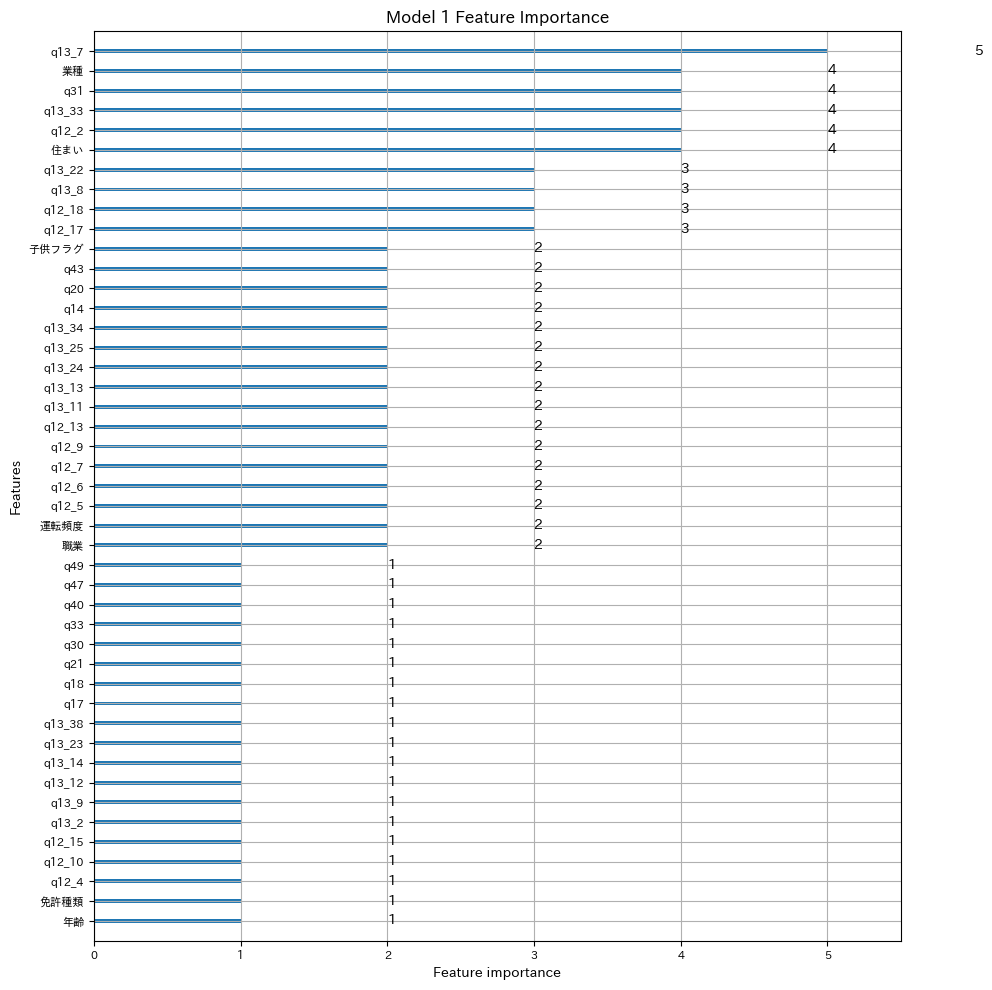

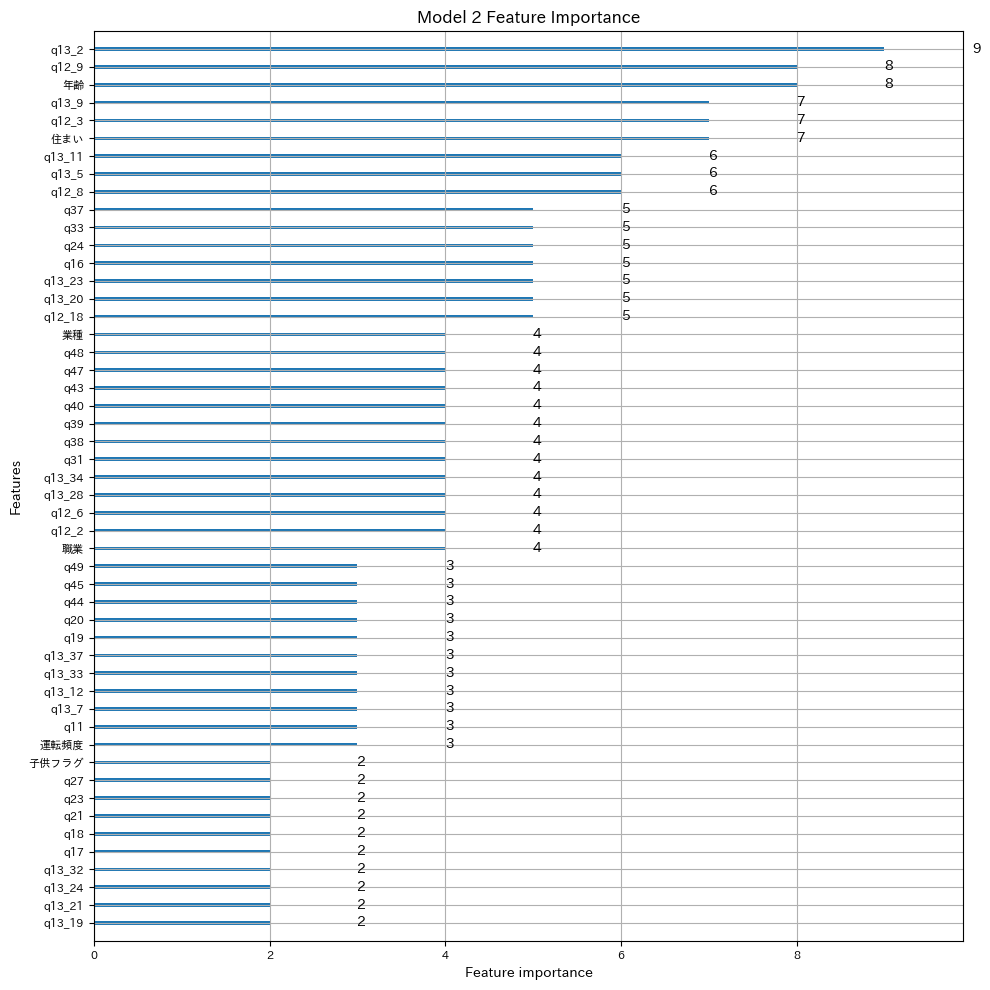

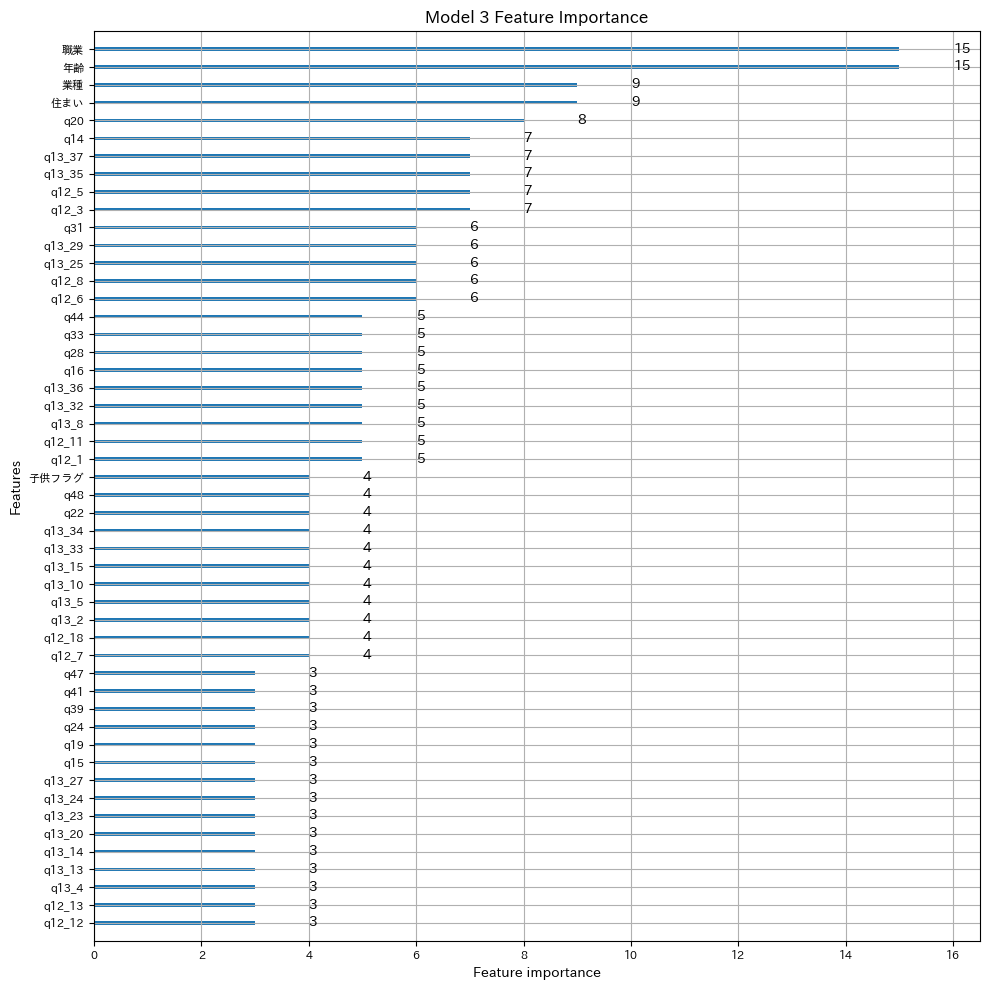

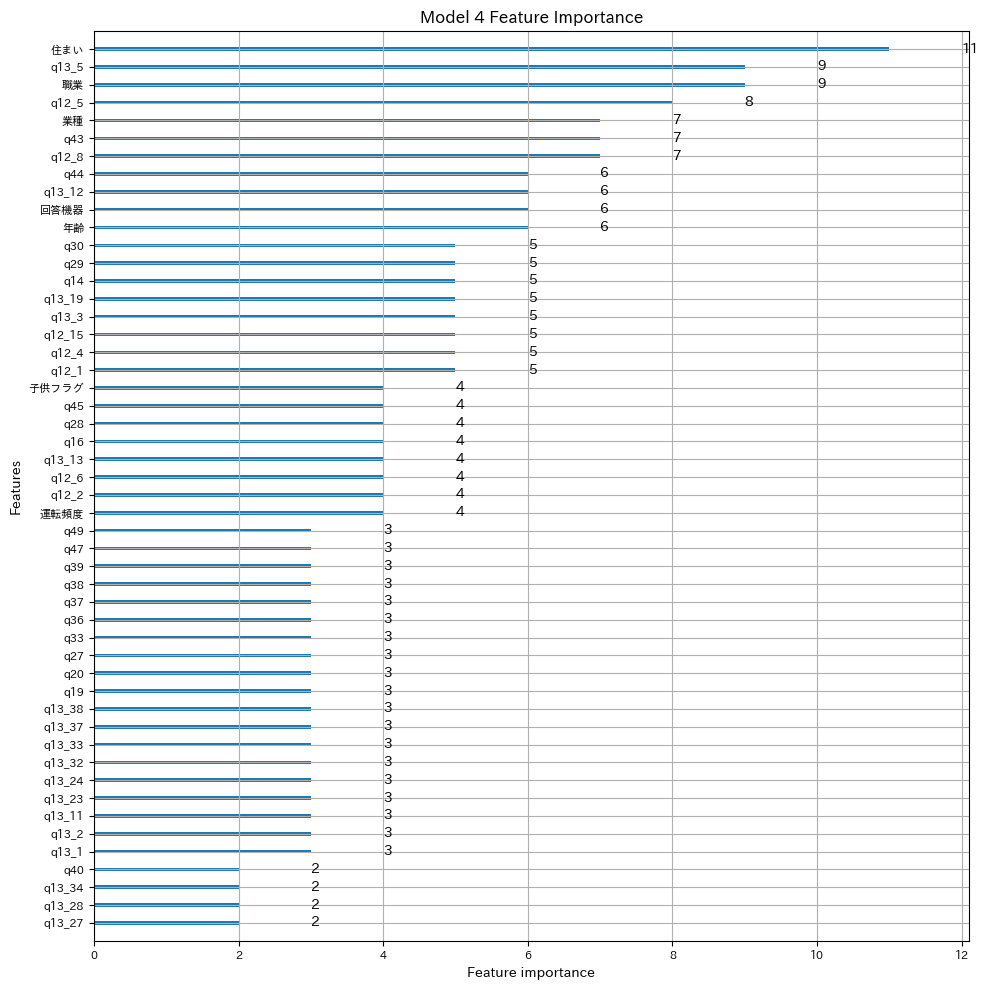

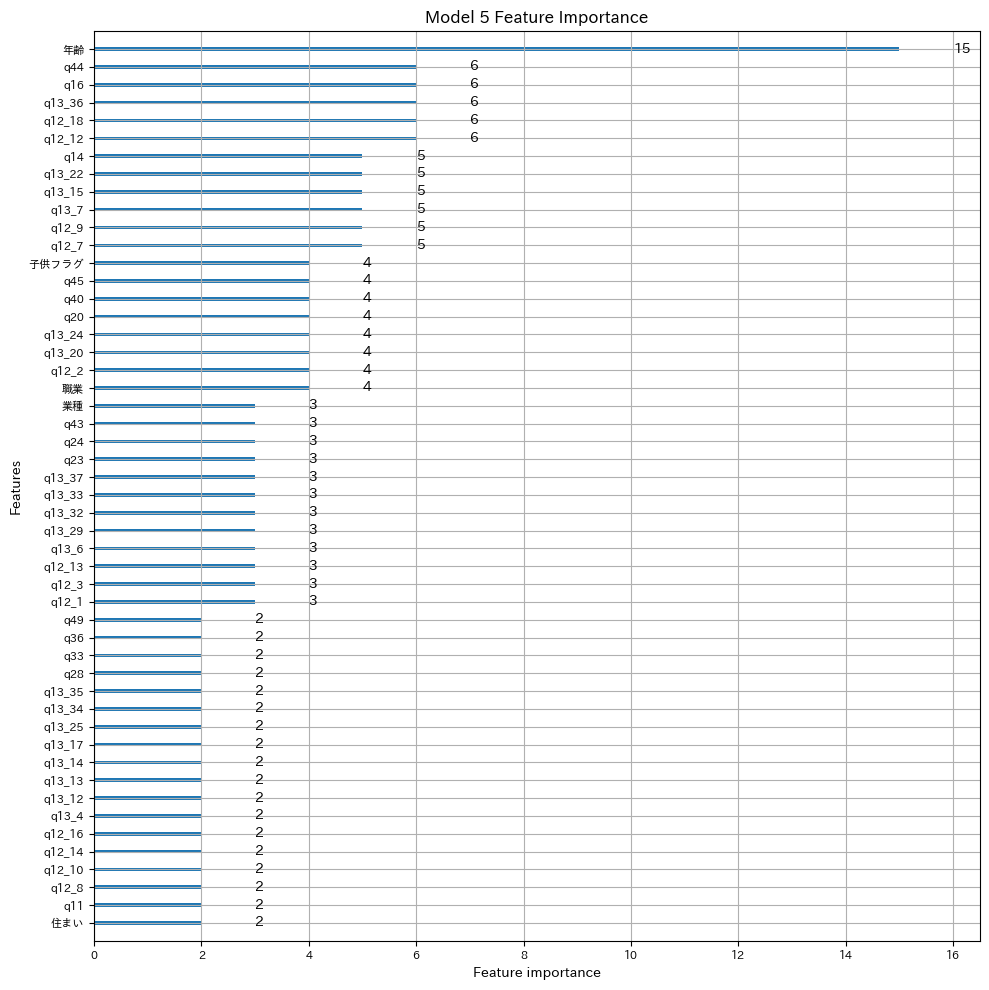

In [44]:
# 特徴量の重要度をプロット
import japanize_matplotlib  # 日本語化matplotlib
for i in range(len(models)):
    model = models[i]
    
    # lgb.plot_importanceの呼び出し、fontsizeオプションで文字を小さく設定
    ax = lgb.plot_importance(model, max_num_features=50, figsize=(10, 10))  # max_num_featuresで上位の特徴量のみ表示（必要に応じて調整）
    ax.tick_params(labelsize=8)  # 文字サイズを小さくする
    
    plt.title(f'Model {i+1} Feature Importance', fontsize=12)  # タイトルを追加
    plt.tight_layout()  # レイアウトを自動調整
    plt.show()


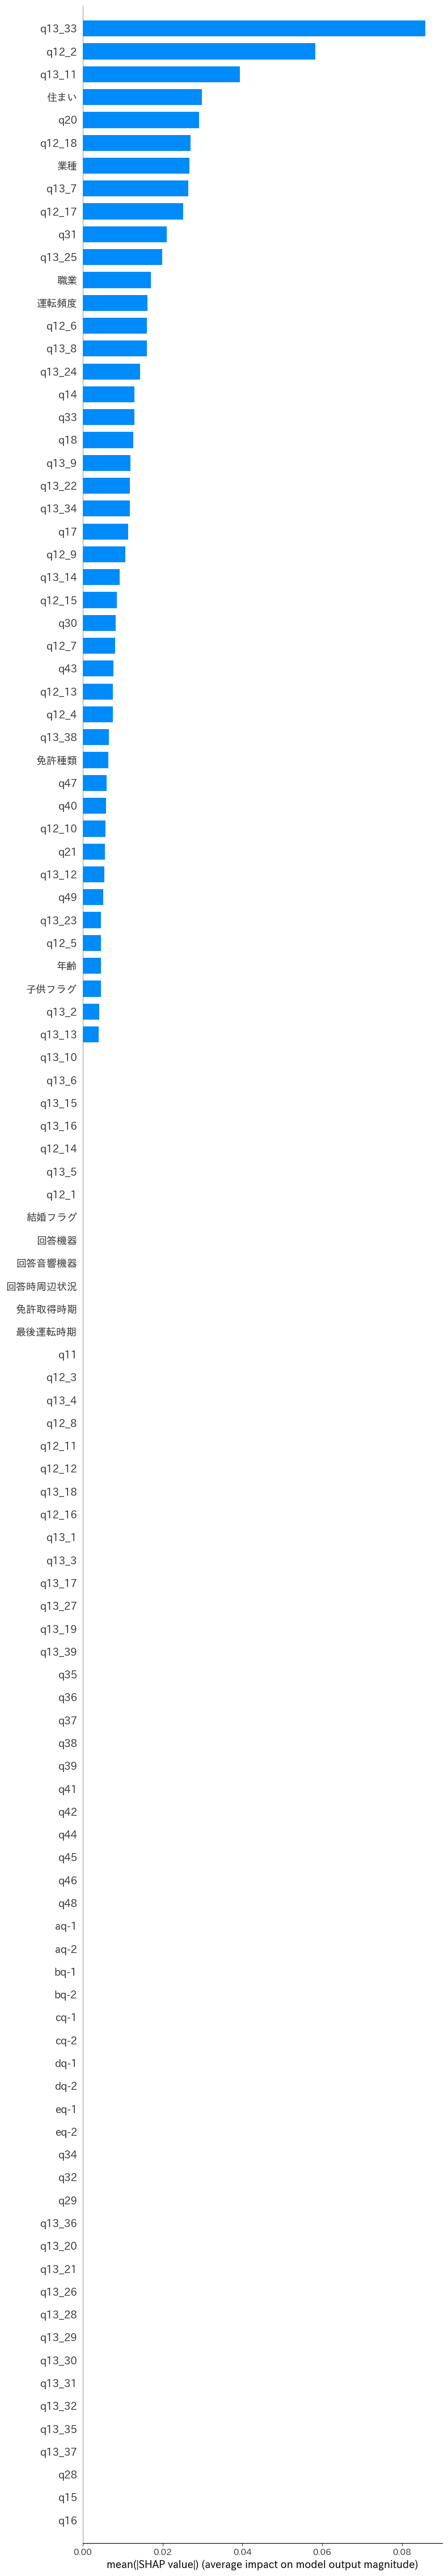

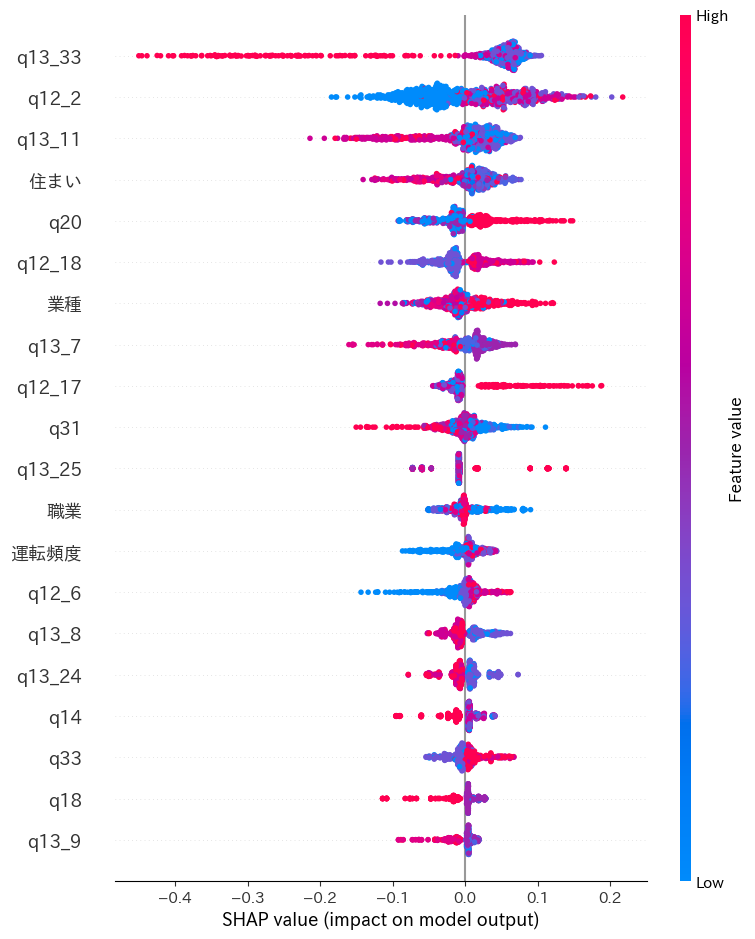

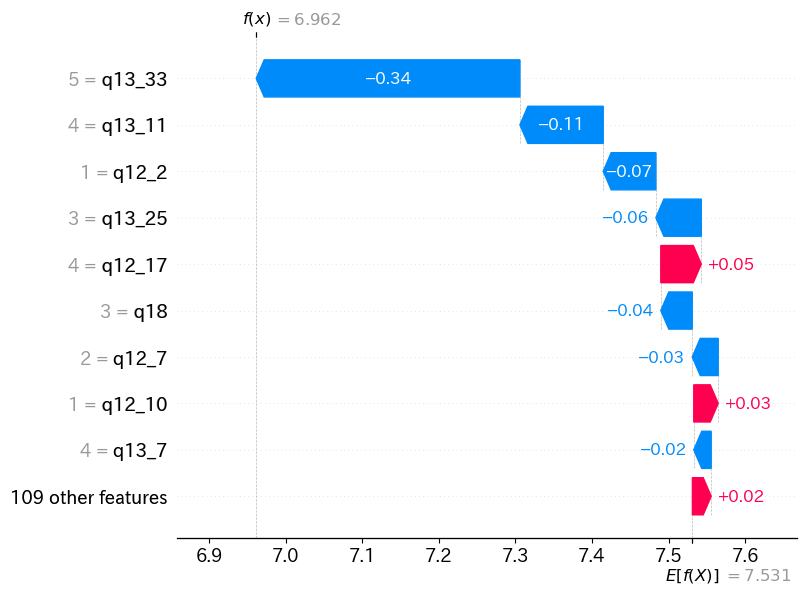

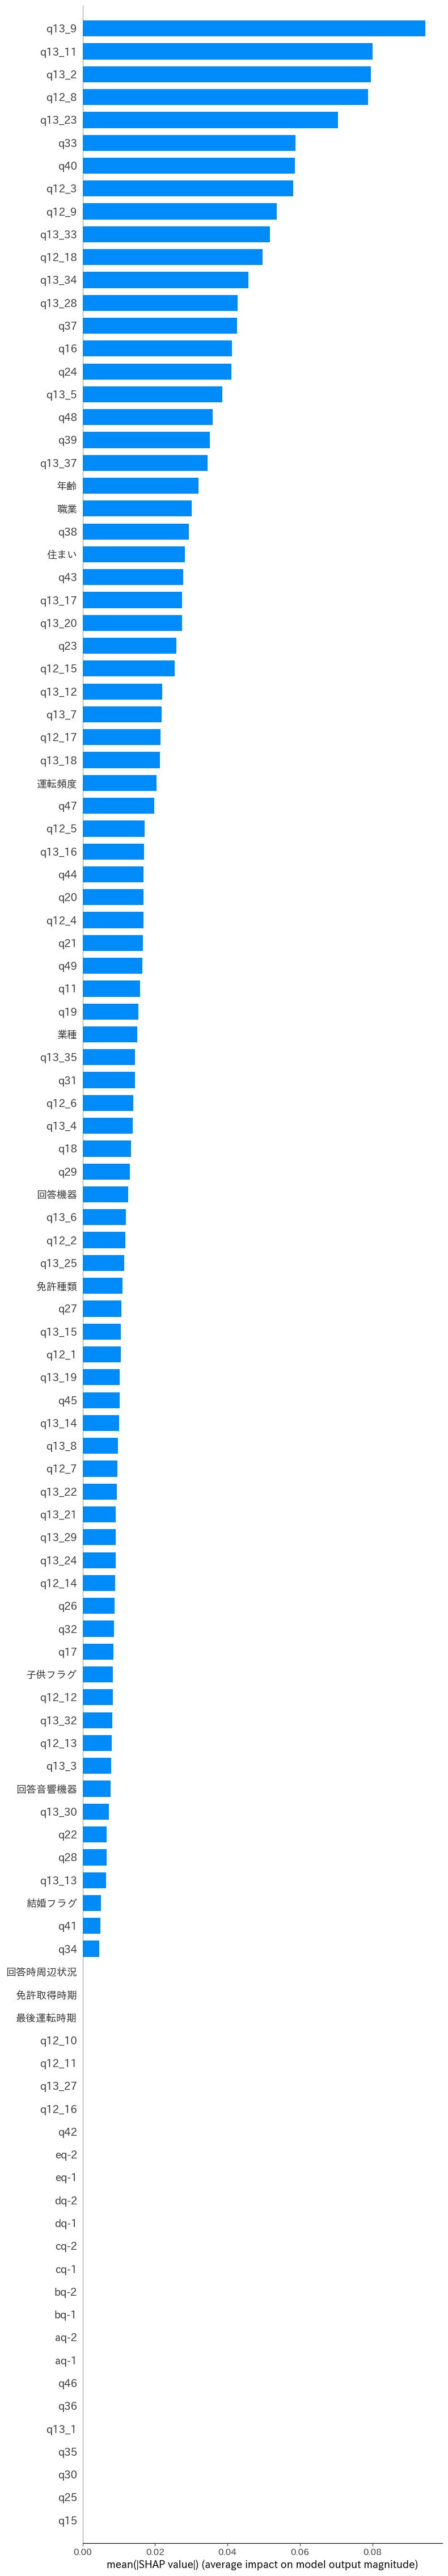

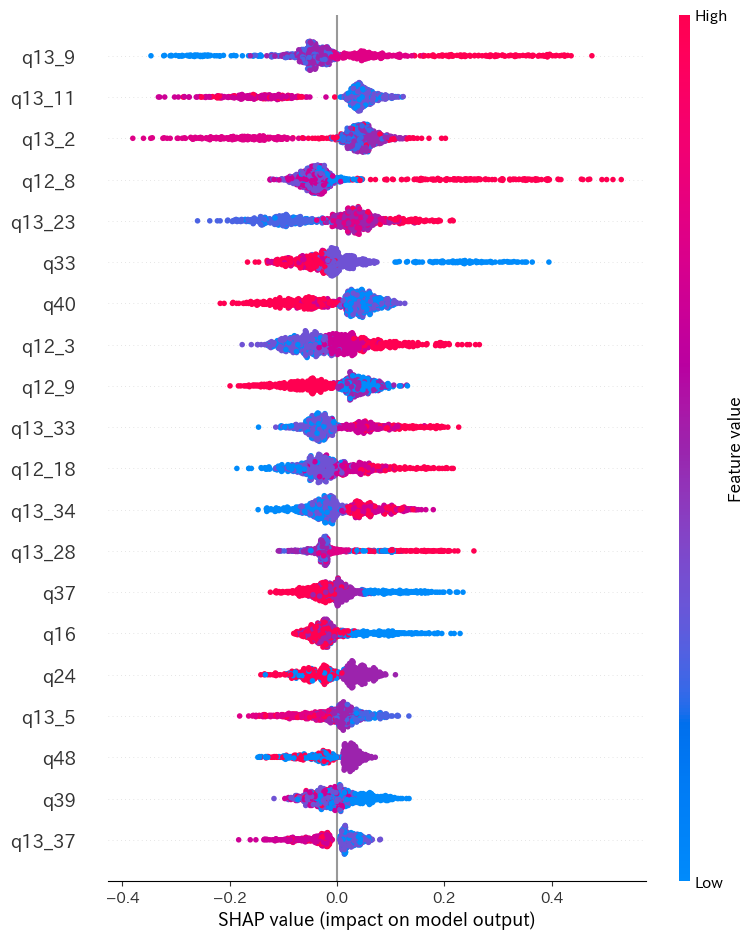

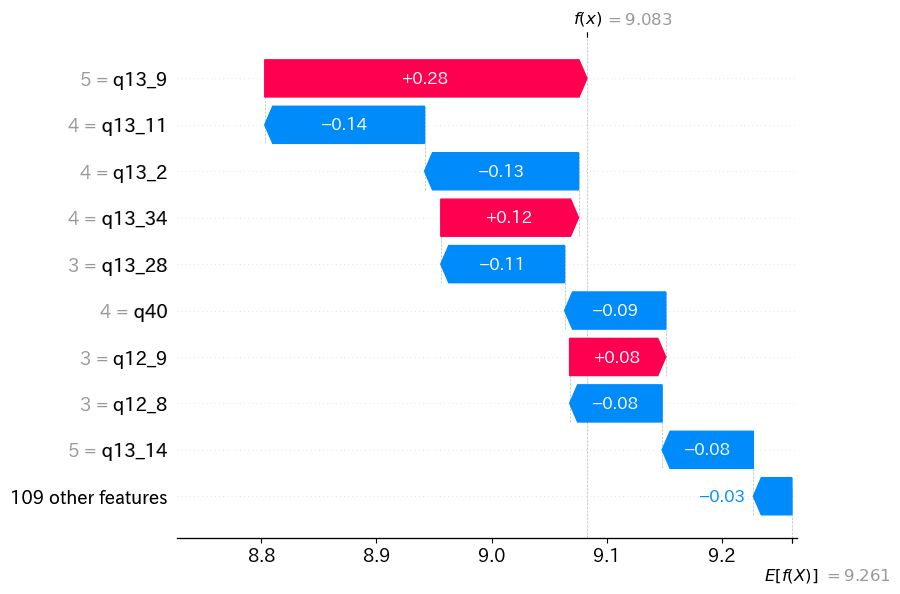

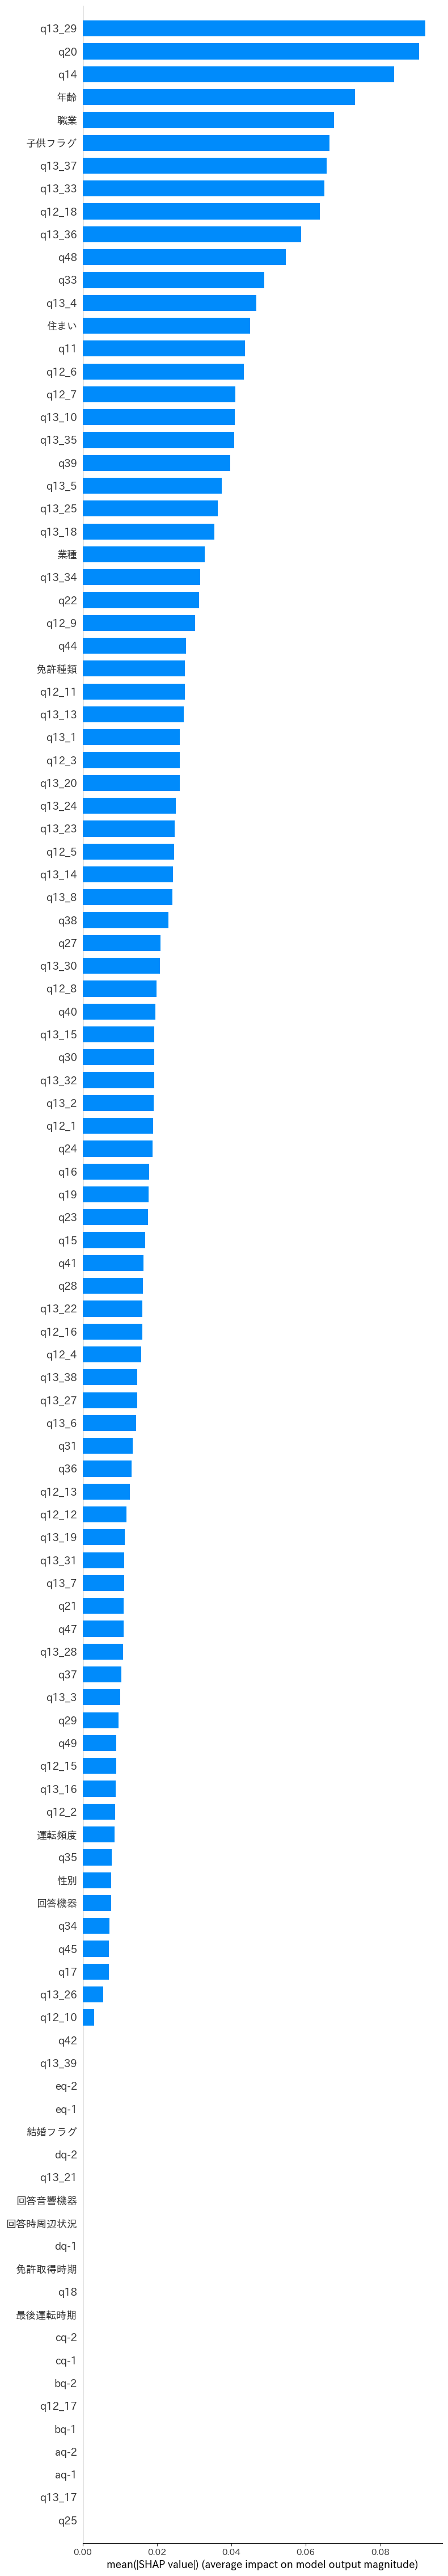

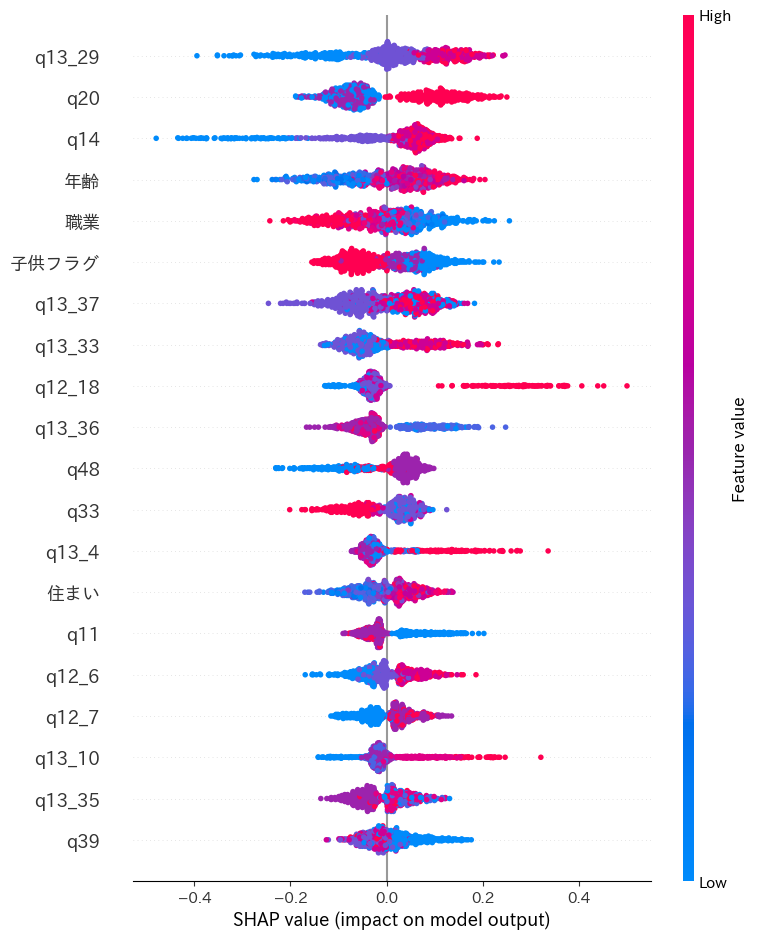

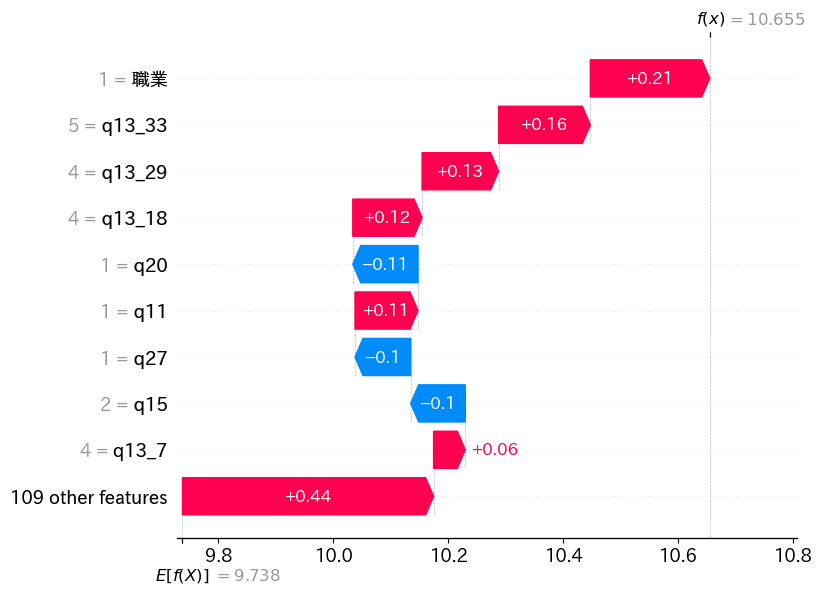

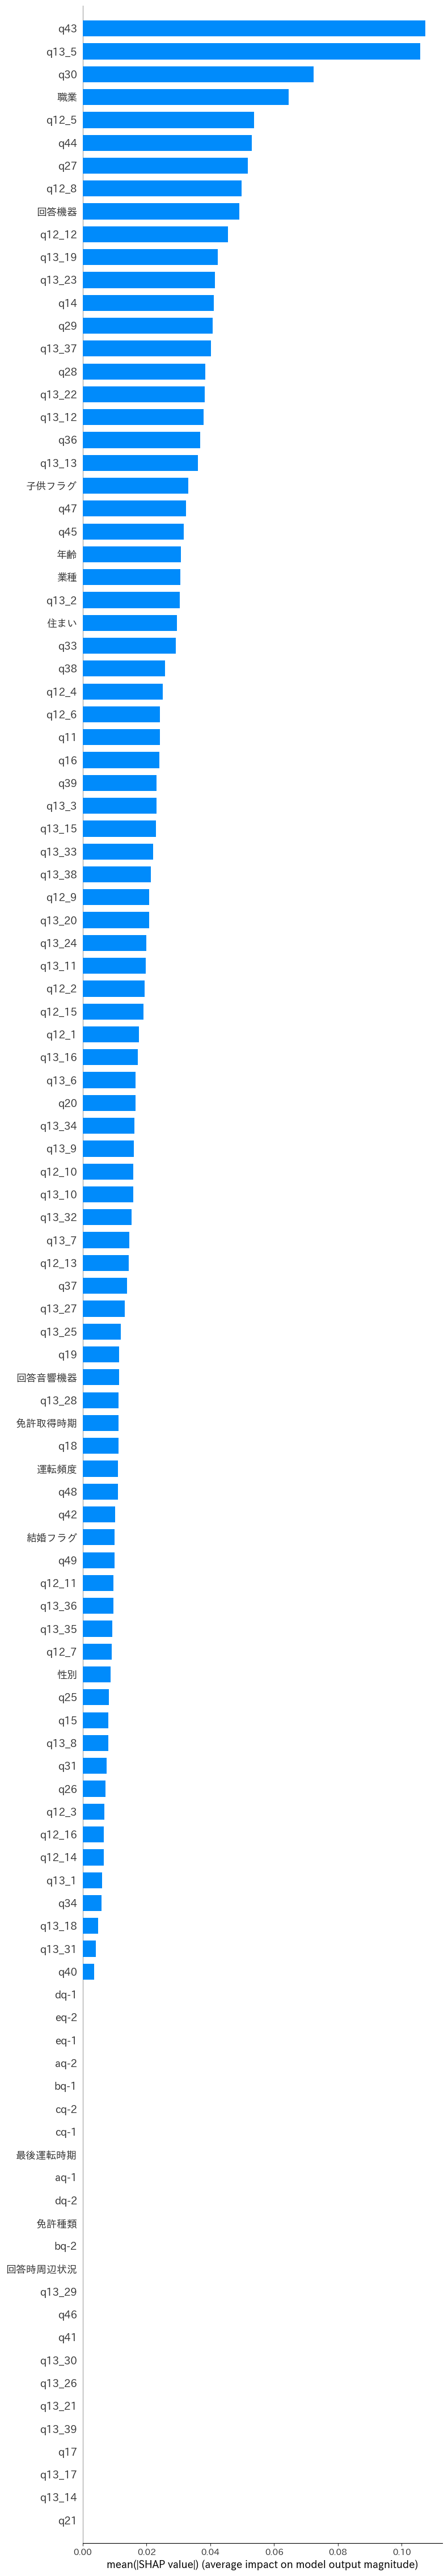

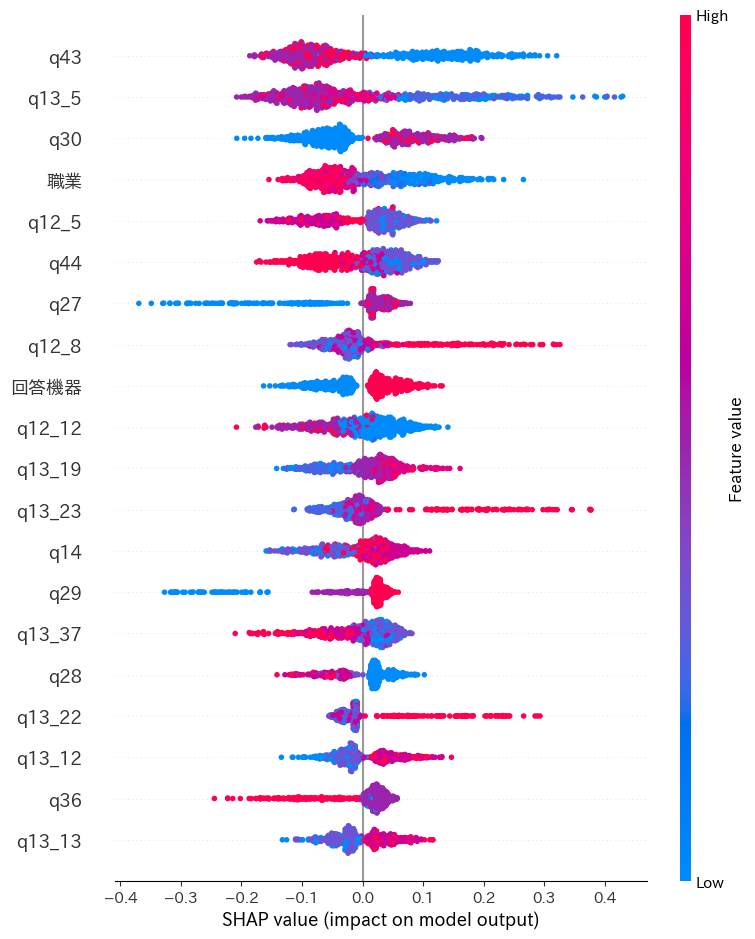

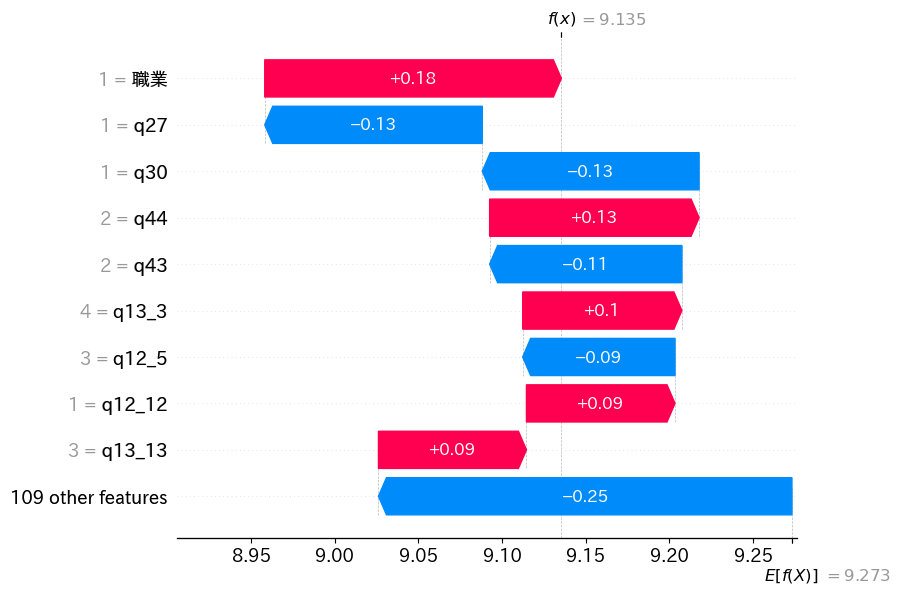

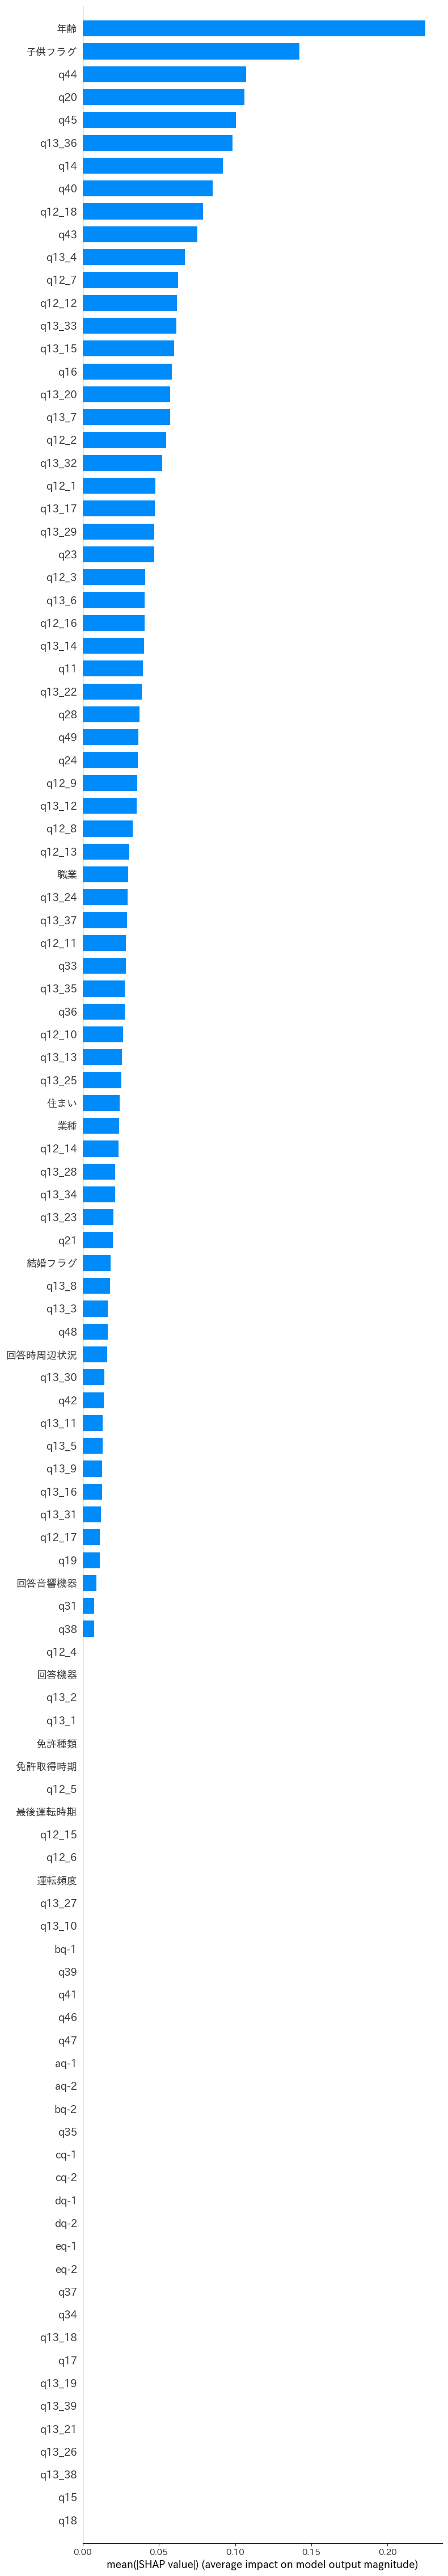

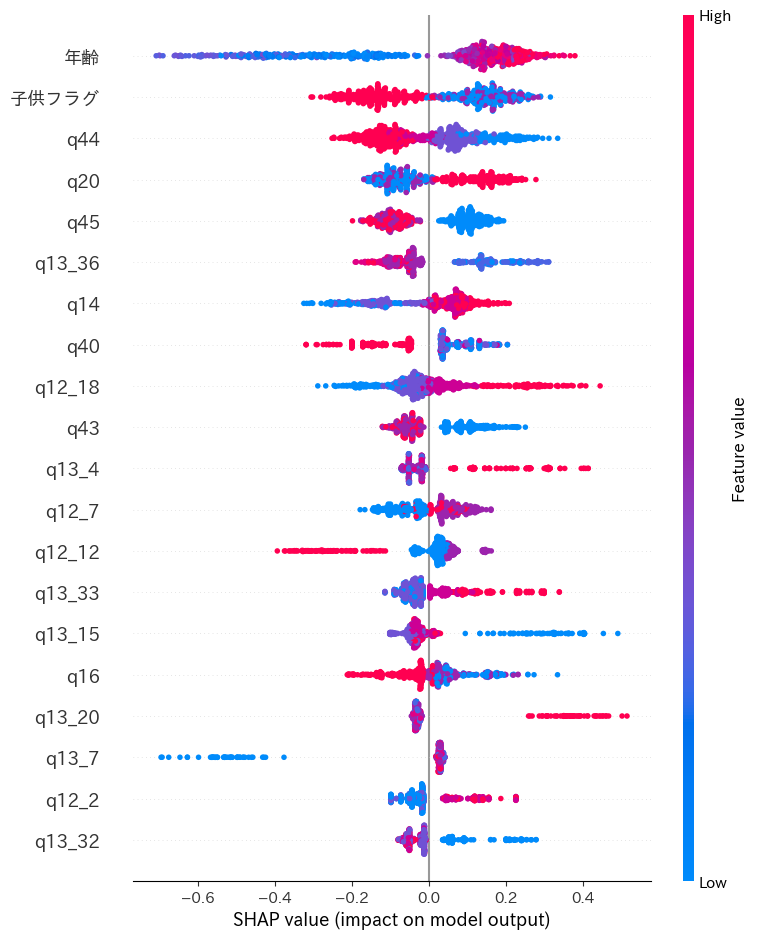

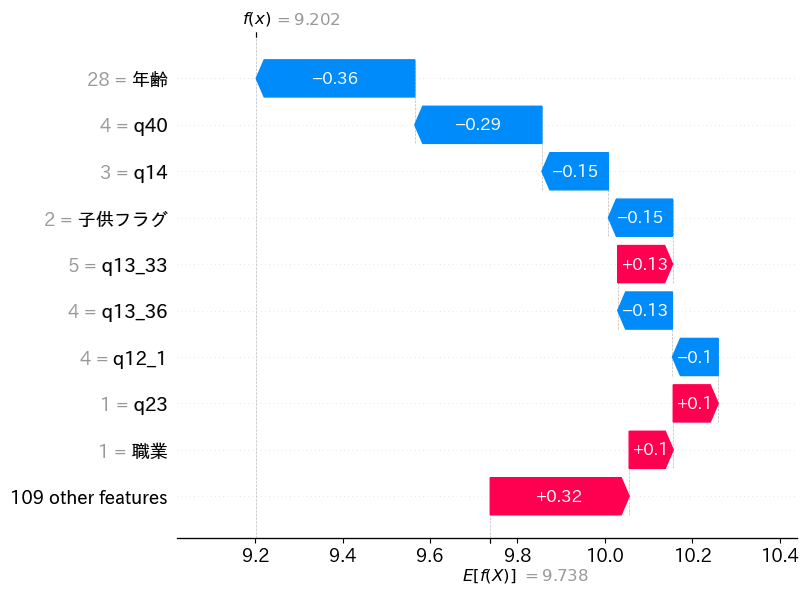

In [62]:
# #shapのインストール
# !pip install shap

#shapのインポート
import shap

for i in range(len(models)):
    model = models[i]
    
    # SHAP値を計算
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    # SHAP値のプロット
    shap.summary_plot(shap_values, X, plot_type='bar', max_display=110)  # max_displayで表示する特徴量の数を指定
    
    # SHAP値のプロット
    shap.summary_plot(shap_values, X, max_display=20)  # max_displayで表示する

    #Waterfall plot
    shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X.iloc[0], feature_names=X.columns.tolist()))




In [16]:
#df.sc2_1のdataframeを作成,列名をageにする
df_age = pd.DataFrame(df.sc2_1)
df_age.rename(columns={'sc2_1':'age'},inplace=True)


AttributeError: 'DataFrame' object has no attribute 'sc2_1'

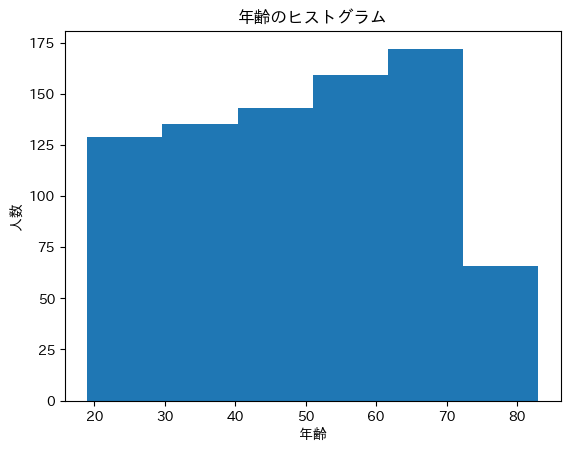

In [97]:

#df.sc2_1のヒストグラム(年齢) 19~83歳
import japanize_matplotlib

#ヒストグラム　bins数を指定
plt.hist(df_age,bins=6)
#ラベル名
plt.xlabel('年齢')
plt.ylabel('人数')
plt.title('年齢のヒストグラム')
plt.show()

In [98]:
#19~30,31~40,41~50,51~60,61~70,71~83
#年齢別の人数
df_age['age_bin'] = pd.cut(df_age['age'], [19,30,40,50,60,70,83], right=False)

df_age.value_counts()
df_age.to_csv('surbay_data.csv',index=False)
df_age.head(10)

age   age_bin
0   28  [19, 30)
1   28  [19, 30)
2   28  [19, 30)
3   20  [19, 30)
4   27  [19, 30)
5   24  [19, 30)
6   28  [19, 30)
7   27  [19, 30)
8   25  [19, 30)
9   20  [19, 30)

In [ ]:
df.coloumns = ['性別','年齢']

In [ ]:
# #カラム名'sc1'を性別に，'sc2_1'を年齢に変更
# df.rename(columns={'sc1':'性別','sc2_1':'年齢'},inplace=True)

In [4]:
na_col = df.isna().any()
print(na_col)
df.loc[:, na_col]

#欠損値のある列を削除
df_dropna = df.dropna(axis=1)
print(df_dropna)


#df_dropna[['no','group1','group2']]列を削除
df_dropna = df_dropna.drop(['no','group1','group2','eq50'], axis=1)
df_dropna




no        False
group1    False
group2    False
sc1       False
sc2_1     False
          ...  
cq-2      False
dq-1      False
dq-2      False
eq-1      False
eq-2      False
Length: 258, dtype: bool
       no  group1  group2  sc1  sc2_1  sc3  sc4  sc5-1  sc5-2  sc5-3  ...  \
0      87       1       1    1     28   14    1      0      0      1  ...   
1     105       1       1    1     28    1    2      1      0      0  ...   
2     109       1       1    1     28   11    2      1      0      0  ...   
3     119       1       1    1     20   21    1      0      0      1  ...   
4     145       1       1    1     27   13    2      0      0      1  ...   
..    ...     ...     ...  ...    ...  ...  ...    ...    ...    ...  ...   
799  2984      12      23    2     72   40    2      1      0      0  ...   
800  2989      12      23    2     71   13    2      0      1      0  ...   
801  2992      12      23    2     72   13    2      0      0      1  ...   
802  2994      12      23    

sc1  sc2_1  sc3  sc4  sc5-1  sc5-2  sc5-3  sc6  sc7-1  sc7-2  ...  aq-1  \
0      1     28   14    1      0      0      1    1      0      0  ...     1   
1      1     28    1    2      1      0      0    1      1      0  ...     1   
2      1     28   11    2      1      0      0    9      0      0  ...     1   
3      1     20   21    1      0      0      1   12      0      0  ...     1   
4      1     27   13    2      0      0      1   11      0      0  ...     1   
..   ...    ...  ...  ...    ...    ...    ...  ...    ...    ...  ...   ...   
799    2     72   40    2      1      0      0   10      0      0  ...     1   
800    2     71   13    2      0      1      0   11      0      0  ...     1   
801    2     72   13    2      0      0      1   10      0      0  ...     1   
802    2     75   43    2      0      1      0   11      0      0  ...     1   
803    2     75   28    2      0      1      0   11      0      0  ...     1   

     aq-2  bq-1  bq-2  cq-1  cq-2  dq-1  dq-2  eq-1  eq-2  
0       0     1     0     1     0     1     0     1     0  
1       0     1     0     1     0     1     0     1     0  
2       0     1     0     1     0     1     0     1     0  
3       0     1     0     1     0     1     0     1     0  
4       0     1     0     1     0     1     0     1     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
799     0     1     0     1     0     1     0     1     0  
800     0     1     0     1     0     1     0     1     0  
801     0     1     0     1     0     1     0     1     0  
802     0     1     0     1     0     1     0     1     0  
803     0     1     0     1     0     1     0     1     0  

[804 rows x 247 columns]

In [15]:
df

no  group1  group2  sc1  sc2_1  sc3  sc4  sc5-1  sc5-2  sc5-3  ...  \
0      87       1       1    1     28   14    1      0      0      1  ...   
1     105       1       1    1     28    1    2      1      0      0  ...   
2     109       1       1    1     28   11    2      1      0      0  ...   
3     119       1       1    1     20   21    1      0      0      1  ...   
4     145       1       1    1     27   13    2      0      0      1  ...   
..    ...     ...     ...  ...    ...  ...  ...    ...    ...    ...  ...   
799  2984      12      23    2     72   40    2      1      0      0  ...   
800  2989      12      23    2     71   13    2      0      1      0  ...   
801  2992      12      23    2     72   13    2      0      0      1  ...   
802  2994      12      23    2     75   43    2      0      1      0  ...   
803  2996      12      23    2     75   28    2      0      1      0  ...   

     aq-1  aq-2  bq-1  bq-2  cq-1  cq-2  dq-1  dq-2  eq-1  eq-2  
0       1     0     1     0     1     0     1     0     1     0  
1       1     0     1     0     1     0     1     0     1     0  
2       1     0     1     0     1     0     1     0     1     0  
3       1     0     1     0     1     0     1     0     1     0  
4       1     0     1     0     1     0     1     0     1     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
799     1     0     1     0     1     0     1     0     1     0  
800     1     0     1     0     1     0     1     0     1     0  
801     1     0     1     0     1     0     1     0     1     0  
802     1     0     1     0     1     0     1     0     1     0  
803     1     0     1     0     1     0     1     0     1     0  

[804 rows x 258 columns]

In [5]:
#sc1,sc2_1,sc3,sc4,sc6,sc8,q1,q2,q3,q4,q4sq,q5,q5sq,q6,q7,q8

In [6]:
s = pd.read_excel('主観評価設問状態_origin_出力100.xlsx')
s


好み1  不快1  個人的に好き1  なぜ危険なのか1  どのように改善したらよいか1  なるほど1  自分には関係ない1  改善しようと思う1  \
0      1    3        2         1               1      1          3          3   
1      3    3        3         3               3      3          3          3   
2      1    5        1         1               5      1          5          1   
3      3    3        3         1               5      1          1          1   
4      1    1        1         1               1      1          1          1   
..   ...  ...      ...       ...             ...    ...        ...        ...   
799    3    5        3         1               1      1          3          1   
800    1    5        1         1               5      1          5          1   
801    5    1        5         5               1      4          1          5   
802    1    5        1         1               5      1          1          1   
803    1    5        1         1               5      1          5          1   

     これからは注意して運転しよう1  急ブレーキのたびに出たら不快1  ...  たまに出てきても問題ない5  何度も出てきたら煩わしく5  \
0                  1                3  ...              3              4   
1                  3                3  ...              3              3   
2                  1                1  ...              1              4   
3                  1                1  ...              3              4   
4                  1                5  ...              1              1   
..               ...              ...  ...            ...            ...   
799                3                3  ...              2              3   
800                1                1  ...              5              2   
801                5                5  ...              1              5   
802                3                5  ...              4              4   
803                1                3  ...              3              1   

     ブレーキに関する内容5  自分の運転に対する内容5  何の操作に対する指摘かよくわからなかった5  分かりやすかった5  理解しやすかった5  \
0              4             4                      4          4          4   
1              3             3                      3          3          3   
2              4             5                      2          5          5   
3              5             4                      5          4          4   
4              5             5                      4          5          5   
..           ...           ...                    ...        ...        ...   
799            5             5                      5          5          5   
800            5             5                      1          5          5   
801            5             5                      1          5          5   
802            5             5                      5          5          5   
803            4             4                      5          5          4   

     指摘内容の把握を流暢に5  把握は楽5  難しかった5  
0               4      4       4  
1               3      3       3  
2               3      5       2  
3               4      4       3  
4               5      5       5  
..            ...    ...     ...  
799             5      5       5  
800             5      5       5  
801             5      5       1  
802             5      5       5  
803             4      4       5  

[804 rows x 100 columns]

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7769 - mae: 2.5967 - val_loss: 2.0267 - val_mae: 1.1285
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6587 - mae: 1.0264 - val_loss: 1.2641 - val_mae: 0.8868
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2467 - mae: 0.8827 - val_loss: 1.1029 - val_mae: 0.8122
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 1.1009 - mae: 0.8183 - val_loss: 1.0075 - val_mae: 0.7801
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.9890 - mae: 0.7744 - val_loss: 0.9656 - val_mae: 0.7608
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.9804 - mae: 0.7622 - val_loss: 0.9153 - val_mae: 0.7314
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.8780 - mae: 0.7114 - val_loss: 0.8644 - val_mae: 0.6975
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.8402 - mae: 0.6875 - val_loss: 0.8155 - val_mae: 0.6752
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.82

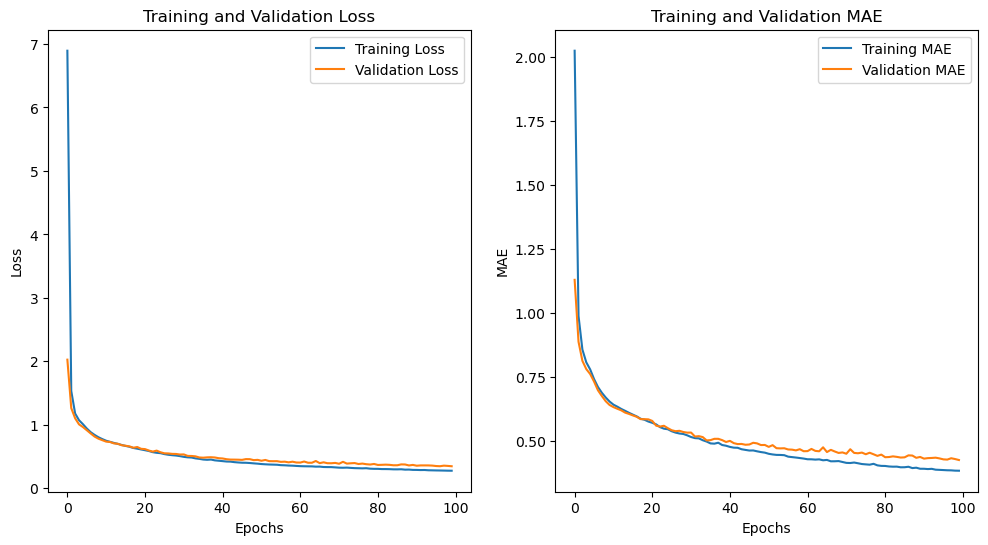

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.2766 - mae: 0.3817
Loss: 0.2872825860977173, MAE: 0.3883293569087982


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 100  # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
# X_train: 入力データ, y_train: 出力データ
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()

# 入力層と最初の隠れ層
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))

# 追加の隠れ層（必要に応じて）
model.add(Dense(hidden_units, activation='relu'))

# 出力層
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # モデルの学習
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
# import matplotlib.pyplot as plt

# モデルの学習（先ほどのコードと同様）
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# 学習過程のグラフ表示
plt.figure(figsize=(12, 6))

# Lossのプロット
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAEのプロット
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
# モデルの評価
loss, mae = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, MAE: {mae}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


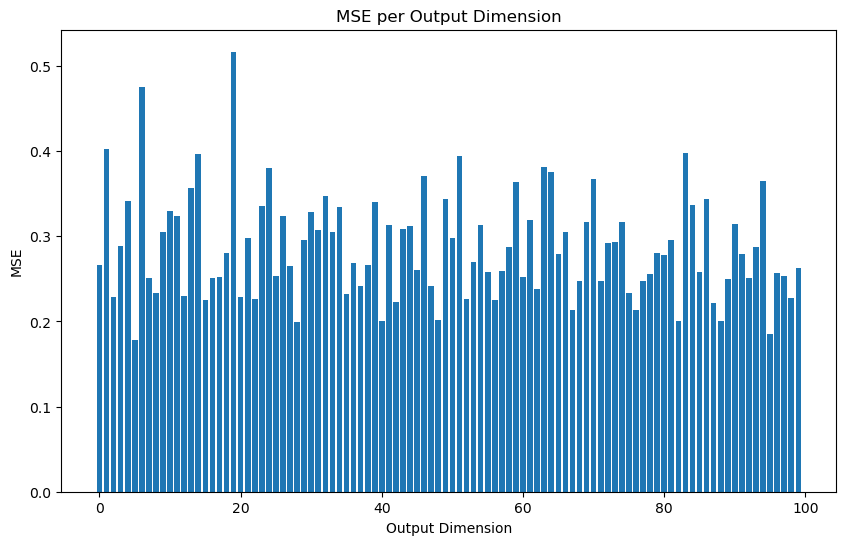

Best dimensions (lowest MSE): 好み1                       5
不快1                      95
個人的に好き1                  28
なぜ危険なのか1                 82
どのように改善したらよいか1           40
なるほど1                    88
自分には関係ない1                48
改善しようと思う1                67
これからは注意して運転しよう1          76
急ブレーキのたびに出たら不快1          87
たまに出てきても問題ない1            42
何度も出てきたら煩わしく1            56
ブレーキに関する内容1              15
自分の運転に対する内容1             22
何の操作に対する指摘かよくわからなかった1    52
分かりやすかった1                98
理解しやすかった1                 2
指摘内容の把握を流暢に1             20
把握は楽1                    12
難しかった1                   35
dtype: int64
MSE of best dimensions: なるほど1              0.178721
分かりやすかった5          0.185426
これからは注意して運転しよう2    0.199768
個人的に好き5            0.200027
好み3                0.200823
これからは注意して運転しよう5    0.200879
これからは注意して運転しよう3    0.201510
改善しようと思う4          0.213077
理解しやすかった4          0.213268
改善しようと思う5          0.221893
個人的に好き3            0.223243
理解しやすかった3          0.225406
分かりやすかった1          0.225751
個人的に好き2  

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/2485858245.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [27]:
# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# # どの次元のロスが大きいかを確認する
# worst_dimensions = np.argsort(mse_per_dim)[-10:]  # ロスが大きい上位10次元
# print("Worst dimensions (highest MSE):", worst_dimensions)
# print("MSE of worst dimensions:", mse_per_dim[worst_dimensions])

#どの次元のロスが小さいかを確認する
best_dimensions = np.argsort(mse_per_dim)[:20]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])



# # ロスが大きい次元のデータをプロット
# plt.figure(figsize=(10, 6))
# for dim in worst_dimensions:
#     plt.plot(y_train.iloc[:, dim], label=f"True (dim={dim})")
#     plt.plot(y_pred[:, dim], label=f"Predicted (dim={dim})")
# plt.title('Worst Dimensions (highest MSE)')
# plt.xlabel('Sample')
# plt.ylabel('Value')
# plt.legend()
# plt.show()




In [28]:
mse_per_dim[0:30]

好み1                      0.266122
不快1                      0.402637
個人的に好き1                  0.228895
なぜ危険なのか1                 0.288685
どのように改善したらよいか1           0.341796
なるほど1                    0.178721
自分には関係ない1                0.475621
改善しようと思う1                0.250687
これからは注意して運転しよう1          0.233698
急ブレーキのたびに出たら不快1          0.305066
たまに出てきても問題ない1            0.329679
何度も出てきたら煩わしく1            0.324062
ブレーキに関する内容1              0.229488
自分の運転に対する内容1             0.357243
何の操作に対する指摘かよくわからなかった1    0.396409
分かりやすかった1                0.225751
理解しやすかった1                0.251324
指摘内容の把握を流暢に1             0.251792
把握は楽1                    0.279871
難しかった1                   0.516833
好み2                      0.229004
不快2                      0.298233
個人的に好き2                  0.225943
なぜ危険なのか2                 0.335449
どのように改善したらよいか2           0.380293
なるほど2                    0.252921
自分には関係ない2                0.323664
改善しようと思う2                0.264673
これからは注意して運転しよう2          0.199768
急ブレーキのたびに出たら不快

In [29]:
np.argsort(mse_per_dim)[-10:] 

たまに出てきても問題ない5            46
何度も出てきたら煩わしく5            64
ブレーキに関する内容5              24
自分の運転に対する内容5             63
何の操作に対する指摘かよくわからなかった5    51
分かりやすかった5                14
理解しやすかった5                83
指摘内容の把握を流暢に5              1
把握は楽5                     6
難しかった5                   19
dtype: int64

In [30]:
y_train

好み1  不快1  個人的に好き1  なぜ危険なのか1  どのように改善したらよいか1  なるほど1  自分には関係ない1  改善しようと思う1  \
0      1    3        2         1               1      1          3          3   
1      3    3        3         3               3      3          3          3   
2      1    5        1         1               5      1          5          1   
3      3    3        3         1               5      1          1          1   
4      1    1        1         1               1      1          1          1   
..   ...  ...      ...       ...             ...    ...        ...        ...   
799    3    5        3         1               1      1          3          1   
800    1    5        1         1               5      1          5          1   
801    5    1        5         5               1      4          1          5   
802    1    5        1         1               5      1          1          1   
803    1    5        1         1               5      1          5          1   

     これからは注意して運転しよう1  急ブレーキのたびに出たら不快1  ...  たまに出てきても問題ない5  何度も出てきたら煩わしく5  \
0                  1                3  ...              3              4   
1                  3                3  ...              3              3   
2                  1                1  ...              1              4   
3                  1                1  ...              3              4   
4                  1                5  ...              1              1   
..               ...              ...  ...            ...            ...   
799                3                3  ...              2              3   
800                1                1  ...              5              2   
801                5                5  ...              1              5   
802                3                5  ...              4              4   
803                1                3  ...              3              1   

     ブレーキに関する内容5  自分の運転に対する内容5  何の操作に対する指摘かよくわからなかった5  分かりやすかった5  理解しやすかった5  \
0              4             4                      4          4          4   
1              3             3                      3          3          3   
2              4             5                      2          5          5   
3              5             4                      5          4          4   
4              5             5                      4          5          5   
..           ...           ...                    ...        ...        ...   
799            5             5                      5          5          5   
800            5             5                      1          5          5   
801            5             5                      1          5          5   
802            5             5                      5          5          5   
803            4             4                      5          5          4   

     指摘内容の把握を流暢に5  把握は楽5  難しかった5  
0               4      4       4  
1               3      3       3  
2               3      5       2  
3               4      4       3  
4               5      5       5  
..            ...    ...     ...  
799             5      5       5  
800             5      5       5  
801             5      5       1  
802             5      5       5  
803             4      4       5  

[804 rows x 100 columns]

Epoch 1/1600


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7587 - mae: 2.3562 - val_loss: 1.7705 - val_mae: 1.0520
Epoch 2/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 1.5108 - mae: 0.9821 - val_loss: 1.2323 - val_mae: 0.8684
Epoch 3/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 1.1614 - mae: 0.8531 - val_loss: 1.0529 - val_mae: 0.7921
Epoch 4/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 1.0433 - mae: 0.7961 - val_loss: 0.9775 - val_mae: 0.7599
Epoch 5/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.9495 - mae: 0.7525 - val_loss: 0.9097 - val_mae: 0.7268
Epoch 6/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.9004 - mae: 0.7268 - val_loss: 0.8530 - val_mae: 0.6967
Epoch 7/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.8700 - mae: 0.7075 - val_loss: 0.8166 - val_mae: 0.6766
Epoch 8/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.8424 - mae: 0.6935 - val_loss: 0.7820 - val_mae: 0.6616
Epoch 9/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step -

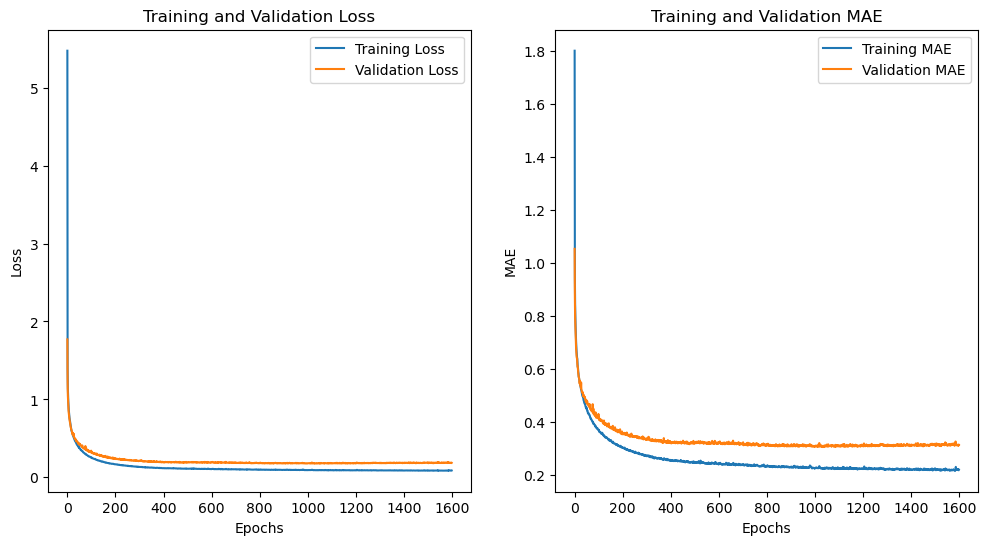

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step


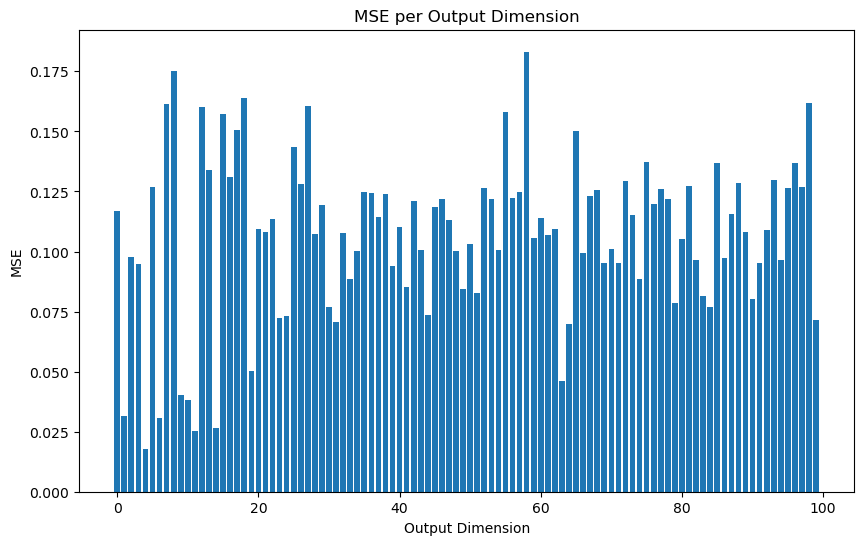

Best dimensions (lowest MSE): 好み1                       4
不快1                      11
個人的に好き1                  14
なぜ危険なのか1                  6
どのように改善したらよいか1            1
なるほど1                    10
自分には関係ない1                 9
改善しようと思う1                63
これからは注意して運転しよう1          19
急ブレーキのたびに出たら不快1          64
たまに出てきても問題ない1            31
何度も出てきたら煩わしく1            99
ブレーキに関する内容1              23
自分の運転に対する内容1             24
何の操作に対する指摘かよくわからなかった1    44
分かりやすかった1                84
理解しやすかった1                30
指摘内容の把握を流暢に1             79
把握は楽1                    90
難しかった1                   83
好み2                      51
不快2                      49
個人的に好き2                  41
なぜ危険なのか2                 74
どのように改善したらよいか2           33
なるほど2                    39
自分には関係ない2                 3
改善しようと思う2                91
これからは注意して運転しよう2          71
急ブレーキのたびに出たら不快2          69
dtype: int64
MSE of best dimensions: どのように改善したらよいか1           0.017809
何度も出てきたら煩わしく1            0.025074
何の操作に対する指摘かよくわからなかった1    

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/4119519471.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 1600 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[:30]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


Epoch 1/300


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5238 - mae: 2.7712 - val_loss: 2.3205 - val_mae: 1.1990
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 1.7800 - mae: 1.0606 - val_loss: 1.2513 - val_mae: 0.8861
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 1.2528 - mae: 0.8915 - val_loss: 1.0730 - val_mae: 0.8080
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 1.0897 - mae: 0.8203 - val_loss: 1.0052 - val_mae: 0.7704
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 1.0199 - mae: 0.7880 - val_loss: 0.9563 - val_mae: 0.7457
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.9625 - mae: 0.7573 - val_loss: 0.9058 - val_mae: 0.7282
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9075 - mae: 0.7306 - val_loss: 0.8699 - val_mae: 0.7095
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.8922 - mae: 0.7204 - val_loss: 0.8442 - val_mae: 0.6863
Epoch 9/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 

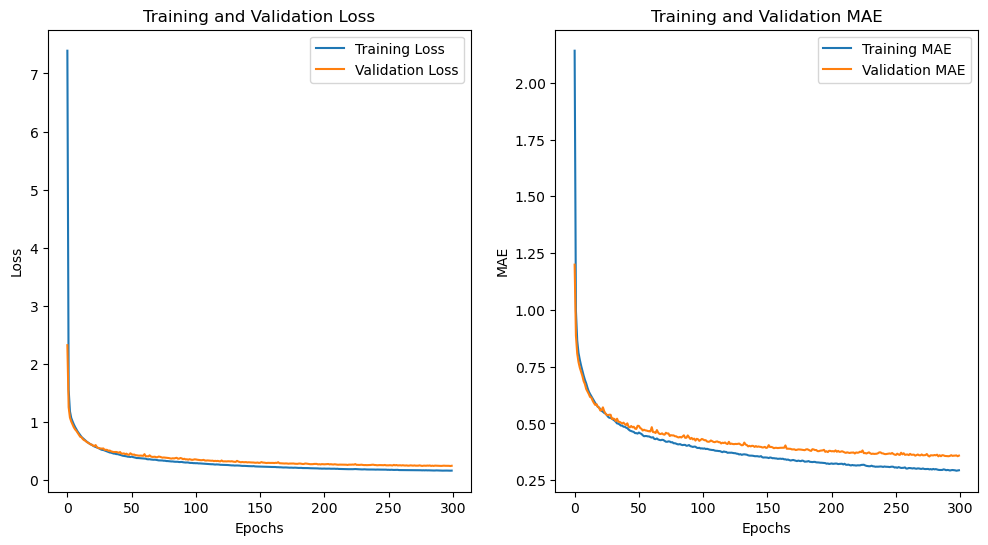

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


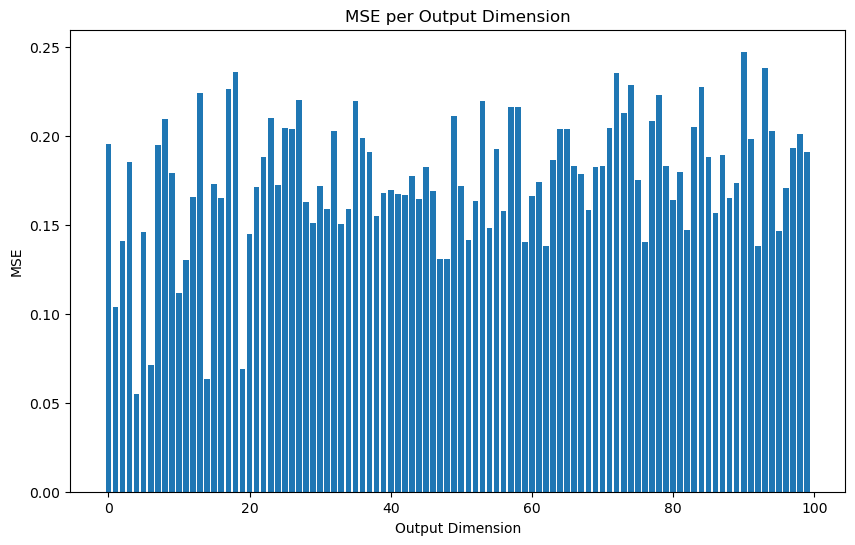

Best dimensions (lowest MSE): 好み1                       4
不快1                      14
個人的に好き1                  19
なぜ危険なのか1                  6
どのように改善したらよいか1            1
なるほど1                    10
自分には関係ない1                11
改善しようと思う1                47
これからは注意して運転しよう1          48
急ブレーキのたびに出たら不快1          92
たまに出てきても問題ない1            62
何度も出てきたら煩わしく1            59
ブレーキに関する内容1              76
自分の運転に対する内容1              2
何の操作に対する指摘かよくわからなかった1    51
分かりやすかった1                20
理解しやすかった1                 5
指摘内容の把握を流暢に1             95
把握は楽1                    82
難しかった1                   54
好み2                      33
不快2                      29
個人的に好き2                  38
なぜ危険なのか2                 86
どのように改善したらよいか2           56
なるほど2                    68
自分には関係ない2                31
改善しようと思う2                34
これからは注意して運転しよう2          28
急ブレーキのたびに出たら不快2          52
dtype: int64
MSE of best dimensions: どのように改善したらよいか1           0.055219
何の操作に対する指摘かよくわからなかった1    0.063670
難しかった1                   

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/3961144140.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 300 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[:30]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


Epoch 1/300


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9436 - mae: 2.5554 - val_loss: 1.8660 - val_mae: 1.0958
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 1.6173 - mae: 1.0112 - val_loss: 1.2519 - val_mae: 0.8905
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 1.2148 - mae: 0.8734 - val_loss: 1.1401 - val_mae: 0.8496
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 1.1448 - mae: 0.8413 - val_loss: 1.0235 - val_mae: 0.7832
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 1.0265 - mae: 0.7845 - val_loss: 0.9977 - val_mae: 0.7636
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.9747 - mae: 0.7631 - val_loss: 0.9477 - val_mae: 0.7534
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.9177 - mae: 0.7382 - val_loss: 0.8833 - val_mae: 0.7165
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.8879 - mae: 0.7192 - val_loss: 0.8388 - val_mae: 0.6992
Epoch 9/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 

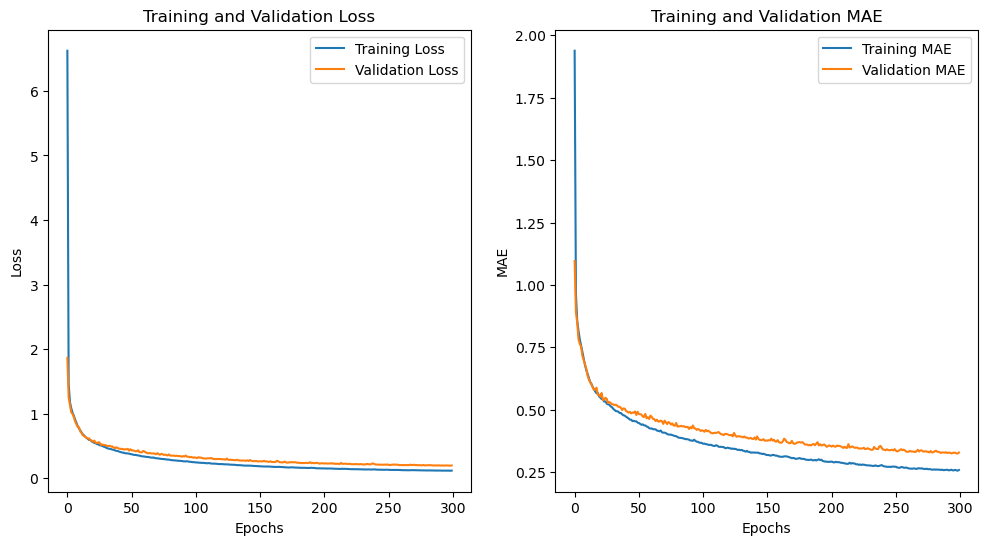

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


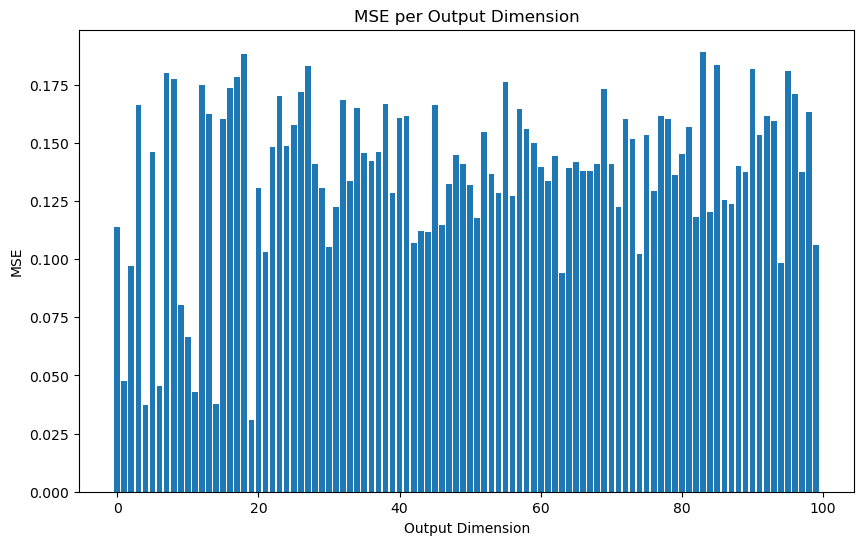

Best dimensions (lowest MSE): たまに出てきても問題ない5            55
何度も出てきたら煩わしく5             8
ブレーキに関する内容5              17
自分の運転に対する内容5              7
何の操作に対する指摘かよくわからなかった5    95
分かりやすかった5                90
理解しやすかった5                27
指摘内容の把握を流暢に5             85
把握は楽5                    18
難しかった5                   83
dtype: int64
MSE of best dimensions: 分かりやすかった3          0.176237
これからは注意して運転しよう1    0.177425
指摘内容の把握を流暢に1       0.178323
改善しようと思う1          0.180089
分かりやすかった5          0.181046
たまに出てきても問題ない5      0.181699
改善しようと思う2          0.183219
なるほど5              0.183727
把握は楽1              0.188098
なぜ危険なのか5           0.189234
dtype: float64


/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/59817509.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 300 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[90:100]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


Epoch 1/500


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6880 - mae: 2.4990 - val_loss: 1.8062 - val_mae: 1.0785
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1.5559 - mae: 0.9991 - val_loss: 1.2398 - val_mae: 0.8759
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1705 - mae: 0.8566 - val_loss: 1.0562 - val_mae: 0.8040
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0428 - mae: 0.7998 - val_loss: 1.0122 - val_mae: 0.7838
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9893 - mae: 0.7735 - val_loss: 0.9578 - val_mae: 0.7637
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9629 - mae: 0.7610 - val_loss: 0.8960 - val_mae: 0.7265
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9053 - mae: 0.7298 - val_loss: 0.8718 - val_mae: 0.7067
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8453 - mae: 0.7013 - val_loss: 0.8182 - val_mae: 0.6864
Epoch 9/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7884 - mae:

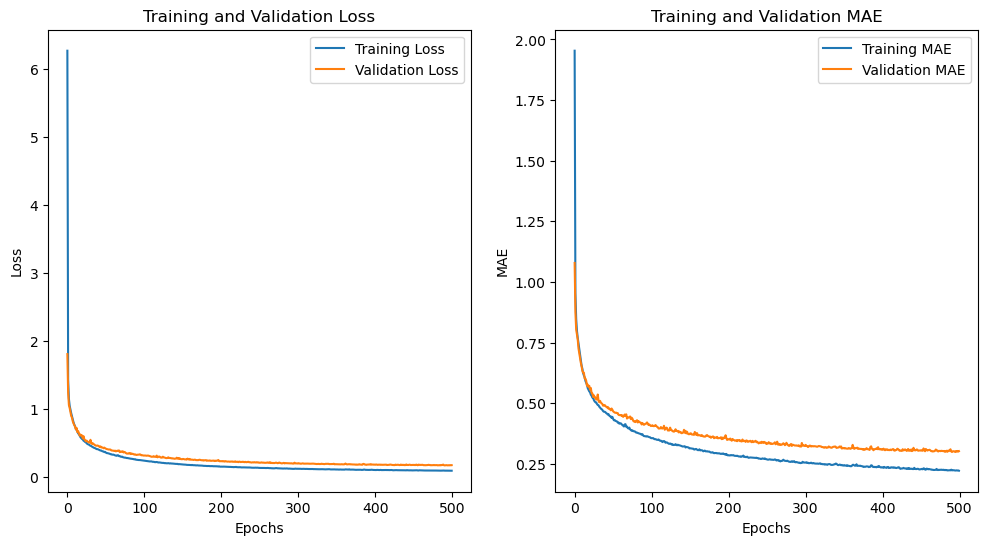

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


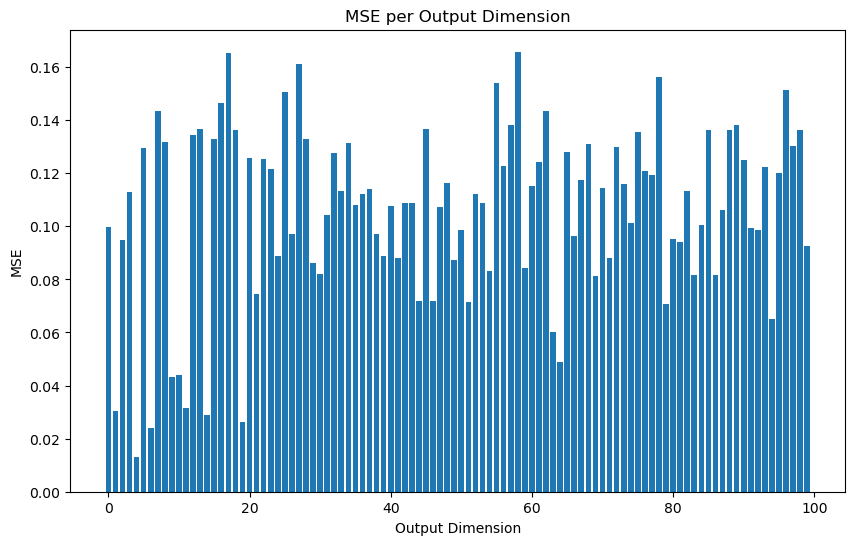

Best dimensions (lowest MSE): 好み1                       4
不快1                       6
個人的に好き1                  19
なぜ危険なのか1                 14
どのように改善したらよいか1            1
なるほど1                    11
自分には関係ない1                 9
改善しようと思う1                10
これからは注意して運転しよう1          64
急ブレーキのたびに出たら不快1          63
たまに出てきても問題ない1            94
何度も出てきたら煩わしく1            79
ブレーキに関する内容1              51
自分の運転に対する内容1             46
何の操作に対する指摘かよくわからなかった1    44
分かりやすかった1                21
理解しやすかった1                69
指摘内容の把握を流暢に1             83
把握は楽1                    86
難しかった1                   30
好み2                      54
不快2                      59
個人的に好き2                  29
なぜ危険なのか2                 49
どのように改善したらよいか2           41
なるほど2                    71
自分には関係ない2                24
改善しようと思う2                39
これからは注意して運転しよう2          99
急ブレーキのたびに出たら不快2          81
dtype: int64
MSE of best dimensions: どのように改善したらよいか1           0.012975
自分には関係ない1                0.024165
難しかった1                   

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/821562151.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 500 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[:30]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [ ]:
mse_per_dim[0:10]
mse_per_dim[best_dimensions][0:10]

best_dimensions
mse_per_dim[best_dimensions]

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_46301/2940674475.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mse_per_dim[best_dimensions][0:10]
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_46301/2940674475.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mse_per_dim[best_dimensions]


なるほど1              0.157656
分かりやすかった5          0.169591
理解しやすかった4          0.174875
これからは注意して運転しよう5    0.185552
これからは注意して運転しよう4    0.191460
これからは注意して運転しよう3    0.194783
ブレーキに関する内容3        0.196620
改善しようと思う4          0.199763
好み4                0.205809
分かりやすかった4          0.206958
dtype: float64

In [8]:
#all_drop_exp.csvを読み込む
df_all_drop_exp = pd.read_csv('all_drop_exp.csv')
df_all_drop_exp[10:14]

Unnamed: 0      d1      d2      d3       d4       d5        w1        w2  \
10          13  3.5283  2.3139  3.2333  4.18517  5.23090  22.70920  15.76695   
11          14  3.2080  2.3115  7.6254  5.64190  7.59495  31.81118  27.72612   
12          15  7.1979  3.1578  5.4769  4.67814  7.07351  25.68948  17.77610   
13          16  4.7634  1.7512  3.5468  3.75658  5.80966  28.51113  12.42138   

          w3        w4  ...  c3  c4  c5  c6  p  none_s  image_s  announce_s  \
10  15.72699  15.66040  ...  30  19  23  15  3  2.7333   2.9444      3.0000   
11  21.77918  20.69237  ...  22  19  14  10  4  1.9778   3.5333      2.8556   
12  16.78791  17.17793  ...  32  20  13  14  3  3.0000   3.0556      3.1111   
13  12.92084  10.67754  ...  40  16  16  12  5  2.5778   3.3222      3.5444   

    image_sound_s  image_announce_s  
10         3.0000            3.2889  
11         3.0000            3.3889  
12         3.6111            3.3778  
13         3.3111            3.5333  

[4 rows x 23 columns]

In [9]:
df_all_drop_s = df_all_drop_exp[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
new_column_names = {'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

df_all_drop_s = df_all_drop_s.rename(columns=new_column_names)
#df_all_drop_sに関して，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の最大値を持つカラム名をカラムとして追加
df_all_drop_s_max = df_all_drop_s.idxmax(axis=1)
df_all_drop_s_max.describe()

count       684
unique        5
top       画像+音声
freq        271
dtype: object

In [10]:
#df_all_drop_s_maxの要素の個数をカウント
df_all_drop_s_max_count = df_all_drop_s_max.value_counts()
df_all_drop_s_max_count

画像+音声     271
音声のみ      202
画像+報知音    108
画像のみ       90
提示なし       13
Name: count, dtype: int64

In [11]:
#画像のみの人を表示
df_image = df_all_drop_s[df_all_drop_s_max == '画像のみ']
df_image

提示なし    画像のみ    音声のみ  画像+報知音   画像+音声
11   1.9778  3.5333  2.8556  3.0000  3.3889
16   2.3333  4.4333  3.6667  4.3222  4.2111
18   2.4667  3.6222  3.1222  3.1222  3.5889
28   3.0444  3.7111  3.3000  3.3000  3.1778
30   3.2667  3.4556  3.2444  2.6111  3.3222
..      ...     ...     ...     ...     ...
624  3.7222  3.9444  3.6667  3.2444  3.7778
634  1.9667  4.8889  4.2667  4.1778  4.7778
643  2.4667  4.7778  4.7667  3.0000  4.7222
677  2.3333  4.4556  3.9444  4.0889  4.1000
682  1.8444  4.6111  4.2444  4.0222  4.3333

[90 rows x 5 columns]

In [12]:
#df_all_drop_s_maxをone-hotエンコーディング
df_all_drop_s_max_one_hot = pd.get_dummies(df_all_drop_s_max).astype(int)
df_all_drop_s_max_one_hot

提示なし  画像+報知音  画像+音声  画像のみ  音声のみ
0       0       0      0     0     1
1       0       0      1     0     0
2       0       0      0     0     1
3       0       0      1     0     0
4       0       0      1     0     0
..    ...     ...    ...   ...   ...
679     0       0      1     0     0
680     1       0      0     0     0
681     0       0      0     0     1
682     0       0      0     1     0
683     0       0      0     0     1

[684 rows x 5 columns]

In [13]:
df_all_drop_exp.columns

Index(['Unnamed: 0', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [14]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
y = df_all_drop_s_max_one_hot

In [15]:
#yの要素の個数をカウント
y_count = y.sum()  
y_count


提示なし       13
画像+報知音    108
画像+音声     271
画像のみ       90
音声のみ      202
dtype: int64

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

提示なし  画像+報知音  画像+音声  画像のみ  音声のみ
439     0       0      0     0     1
257     0       0      1     0     0
558     0       0      1     0     0
587     0       0      0     0     1
18      0       0      0     1     0
..    ...     ...    ...   ...   ...
71      0       1      0     0     0
106     0       0      1     0     0
270     0       1      0     0     0
435     0       0      0     0     1
102     0       0      1     0     0

[547 rows x 5 columns]

In [17]:








# 特徴量の標準化を含むパイプラインの構築
scaler = StandardScaler()
clf = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('classifier', clf)
])

# モデルのトレーニング
pipeline.fit(X_train, y_train)

# 予測と評価
y_pred = pipeline.predict(X_test)

# # y_test と y_pred を再度エンコード解除して比較
# y_test_labels = encoder.inverse_transform(y_test)
# y_pred_labels = encoder.inverse_transform(y_pred)

# print(classification_report(y_test_labels, y_pred_labels))
# print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))

print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        18
           2       0.56      0.15      0.24        60
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        42

   micro avg       0.41      0.07      0.11       137
   macro avg       0.11      0.03      0.05       137
weighted avg       0.25      0.07      0.10       137
 samples avg       0.07      0.07      0.07       137

Accuracy: 0.06569343065693431


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


参考文献　機械学習：https://qiita.com/hikaru_/items/3d64af35769235471d9c

In [18]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

#ここから学習用データとテスト用データに分ける。random_stateは乱数を固定
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [19]:
df_all_drop_s_max

0       音声のみ
1      画像+音声
2       音声のみ
3      画像+音声
4      画像+音声
       ...  
679    画像+音声
680     提示なし
681     音声のみ
682     画像のみ
683     音声のみ
Length: 684, dtype: object

In [20]:
# # k-近傍法（k-NN）
# from sklearn.neighbors import KNeighborsClassifier

# #k-NNインスタンス。今回は3個で多数決。3の値を変更して色々試すと〇
# model = KNeighborsClassifier(n_neighbors=3)
# #学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
# model.fit(X_train, y_train)

# # .scoreで正解率を算出。
# print("train score:",model.score(X_train,y_train))
# print("test score:",model.score(X_test,y_test))

In [21]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

# 決定木インスタンス(木の深さ3)
model = DecisionTreeClassifier(max_depth=3)
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.46393762183235865
test score: 0.36257309941520466


In [22]:
# サポートベクターマシン（SVM）
from sklearn.svm import LinearSVC

# SVMインスタンス
model = LinearSVC()
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.39766081871345027
test score: 0.391812865497076


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')






/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.001}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train score: 0.43875685557586835
test score: 0.3284671532846715
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.17      0.11      0.13        19
       画像+音声       0.35      0.61      0.45        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.35      0.24      0.29        49

    accuracy                           0.33       137
   macro avg       0.17      0.19      0.17       137
weighted avg       0.28      0.33      0.29       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


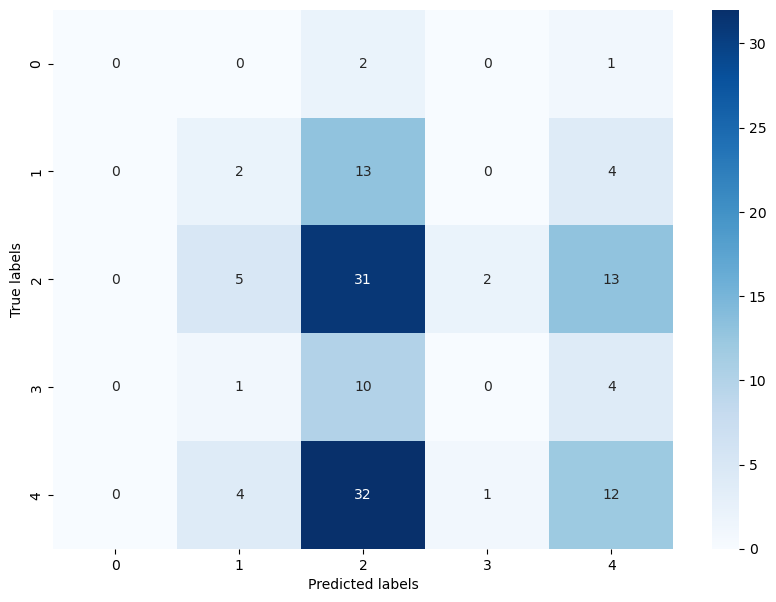

In [24]:
#最適なパラメータを使ってモデルを再構築
model = LinearSVC(C=0.001, max_iter=10000)
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm =confusion_matrix(y_test, y_pred)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



# ヒートマップの描画
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# #特徴量の重要度
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# plt.figure(figsize=(10, 7))
# plt.barh(range(len(importances)), importances[indices], align='center')
# plt.yticks(range(len(importances)), np.array(features)[indices])
# plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')
    

In [25]:
#AUC曲線
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# ターゲットをone-hotエンコーディング
Y = label_binarize(Y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(C=0.001, max_iter=10000)

# OneVsRestClassifierで多クラス分類
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# ROC曲線を描画
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')

NameError: name 'LabelEncoder' is not defined

In [ ]:
#xgboostを使用
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# モデルの構築
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ラベルのエンコードを元に戻す
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

#各ラベルの値を確認
print(label_encoder.classes_)


Accuracy: 0.29927007299270075
[[ 0  0  2  1  0]
 [ 0  2 10  0  7]
 [ 0  4 27  2 18]
 [ 0  1 11  1  2]
 [ 0  3 32  3 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.11      0.14        19
           2       0.33      0.53      0.41        51
           3       0.14      0.07      0.09        15
           4       0.29      0.22      0.25        49

    accuracy                           0.30       137
   macro avg       0.19      0.19      0.18       137
weighted avg       0.27      0.30      0.27       137

['提示なし' '画像+報知音' '画像+音声' '画像のみ' '音声のみ']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#パラメータの調整
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの設定
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# グリッドサーチ
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')

#最適なパラメータを使ってモデルを再構築
model = xgb.XGBClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.32116788321167883
[[ 0  0  3  0  0]
 [ 0  0 12  0  7]
 [ 0  4 35  1 11]
 [ 0  0 12  0  3]
 [ 0  2 37  1  9]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.00      0.00      0.00        19
       画像+音声       0.35      0.69      0.47        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.30      0.18      0.23        49

    accuracy                           0.32       137
   macro avg       0.13      0.17      0.14       137
weighted avg       0.24      0.32      0.26       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


[[ 0  0  3  0  0]
 [ 0  0 12  0  7]
 [ 0  4 35  1 11]
 [ 0  0 12  0  3]
 [ 0  2 37  1  9]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.00      0.00      0.00        19
       画像+音声       0.35      0.69      0.47        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.30      0.18      0.23        49

    accuracy                           0.32       137
   macro avg       0.13      0.17      0.14       137
weighted avg       0.24      0.32      0.26       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.dra

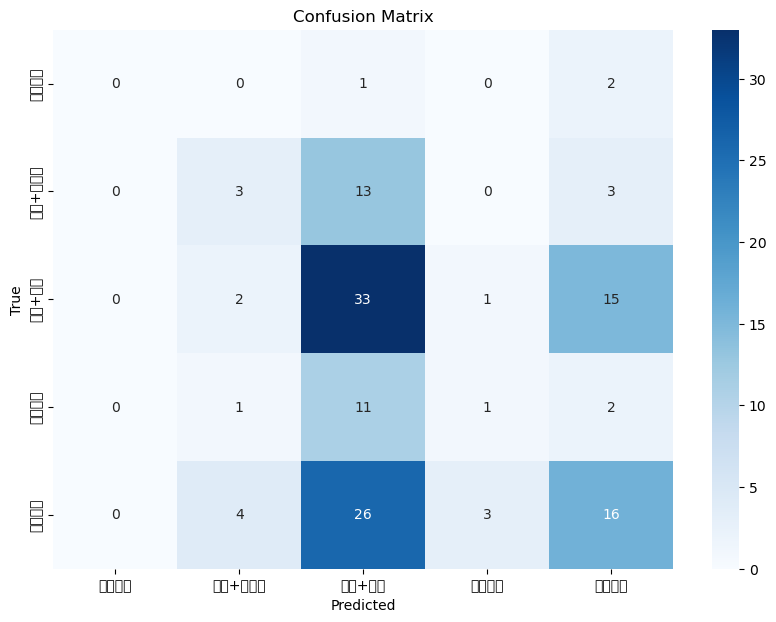

In [183]:

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [184]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')




/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.001}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


参考文献　グリッドサーチ：https://qiita.com/WealthyFirst/items/c81f7cea72a44a7bfd3a

In [185]:
# tuned_parameters = [
#     {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#     {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
#     ]
# score = 'f1'
# clf = GridSearchCV(
#     SVC(), # 識別器
#     tuned_parameters, # 最適化したいパラメータセット 
#     cv=5, # 交差検定の回数
#     scoring='%s_weighted' % score ) # モデルの評価関数の指定

In [186]:
# クロスバリデーションでモデルの評価
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

# 最終的なモデルの学習
model.fit(X_train, y_train)

# 訓練データとテストデータでのスコアを表示
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

Cross-validation scores: [0.37272727 0.30909091 0.3853211  0.34862385 0.3853211 ]
Average cross-validation score: 0.36021684737281073
train score: 0.43144424131627057
test score: 0.35766423357664234


In [187]:
# !pip install tensorflow

In [188]:
X_train.shape[1]

17

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの訓練
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1273 - loss: 1.7402 - val_accuracy: 0.2636 - val_loss: 1.5621
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3231 - loss: 1.5347 - val_accuracy: 0.3182 - val_loss: 1.5236
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3998 - loss: 1.4254 - val_accuracy: 0.3455 - val_loss: 1.5212
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.4366 - loss: 1.3611 - val_accuracy: 0.3455 - val_loss: 1.5215
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4055 - loss: 1.3599 - val_accuracy: 0.3091 - val_loss: 1.5234
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4300 - loss: 1.3172 - val_accuracy: 0.3182 - val_loss: 1.5259
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4706 - loss: 1.2848 - val_accuracy: 0.3364 - val_loss: 1.5221
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4426 - loss: 1.2738 - val_accuracy: 0.3091 - val_loss: 1.5239
E

Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2471 - loss: 1.6792 - val_accuracy: 0.1727 - val_loss: 1.6404
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3096 - loss: 1.5503 - val_accuracy: 0.2182 - val_loss: 1.5665
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3867 - loss: 1.4419 - val_accuracy: 0.2545 - val_loss: 1.5324
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4030 - loss: 1.3790 - val_accuracy: 0.2727 - val_loss: 1.5134
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.4092 - loss: 1.3344 - val_accuracy: 0.2636 - val_loss: 1.5040
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4215 - loss: 1.3321 - val_accuracy: 0.2545 - val_loss: 1.5012
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4134 - loss: 1.2948 - val_accuracy: 0.2727 - val_loss: 1.5014
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.4197 - loss: 1.3043 - val_accuracy: 0.2727 - val_loss:

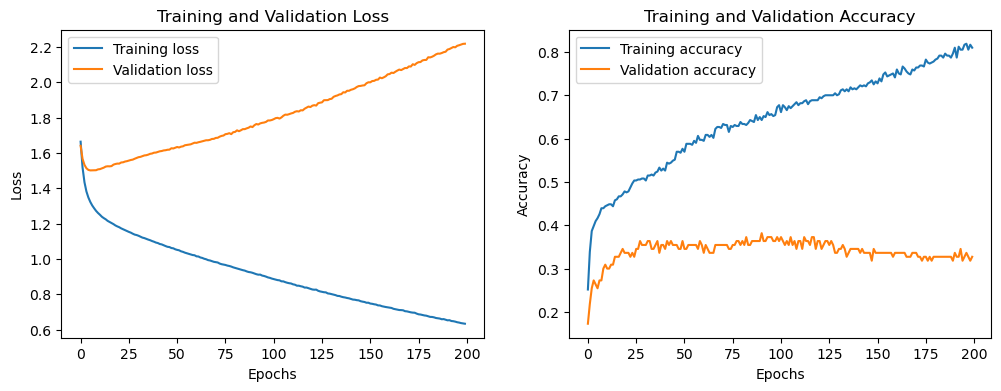

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 訓練パラメータ
epochs = 200
batch_size = 32

# モデルの訓練
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
# 訓練と検証の損失をプロット
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2287 - loss: 1.7178 - val_accuracy: 0.2045 - val_loss: 1.5824
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3178 - loss: 1.5849 - val_accuracy: 0.3409 - val_loss: 1.5130
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3908 - loss: 1.4702 - val_accuracy: 0.3864 - val_loss: 1.4810
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3748 - loss: 1.4457 - val_accuracy: 0.3636 - val_loss: 1.4673
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3820 - loss: 1.3676 - val_accuracy: 0.3636 - val_loss: 1.4606
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4157 - loss: 1.3559 - val_accuracy: 0.3636 - val_loss: 1.4532
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4300 - loss: 1.3552 - val_accuracy: 0.3750 - val_loss: 1.4445
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4245 - loss: 1.3361 - val_accuracy: 0.3750 - val_loss: 1.4

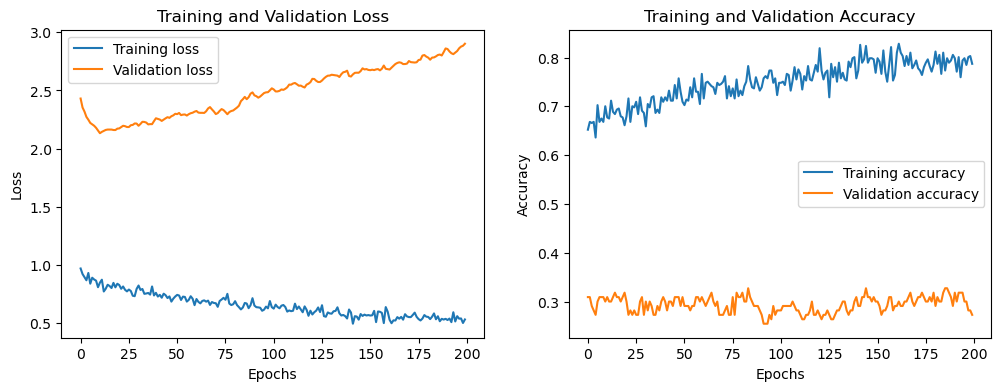

In [191]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 交差検証の設定
fold_num = 5
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X_train, y_train):
    # モデルの定義
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    # モデルのコンパイル
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    history = model.fit(X_train[train], y_train[train], epochs=200, batch_size=32, validation_split=0.2, verbose=1)

    # 評価
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# モデルの最終訓練
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
plt.figure(figsize=(12, 4))

# 訓練と検証の損失をプロット
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.3548 - loss: 2.3561
Test loss: 2.208155393600464
Test accuracy: 0.37956205010414124


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.12      0.11      0.11        19
       画像+音声       0.44      0.49      0.46        51
        画像のみ       0.17      0.13      0.15        15
        音声のみ       0.44      0.47      0.46        49

    accuracy                           0.38       137
   macro avg       0.23      0.24      0.24       137
weighted avg       0.36      0.38      0.37       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/

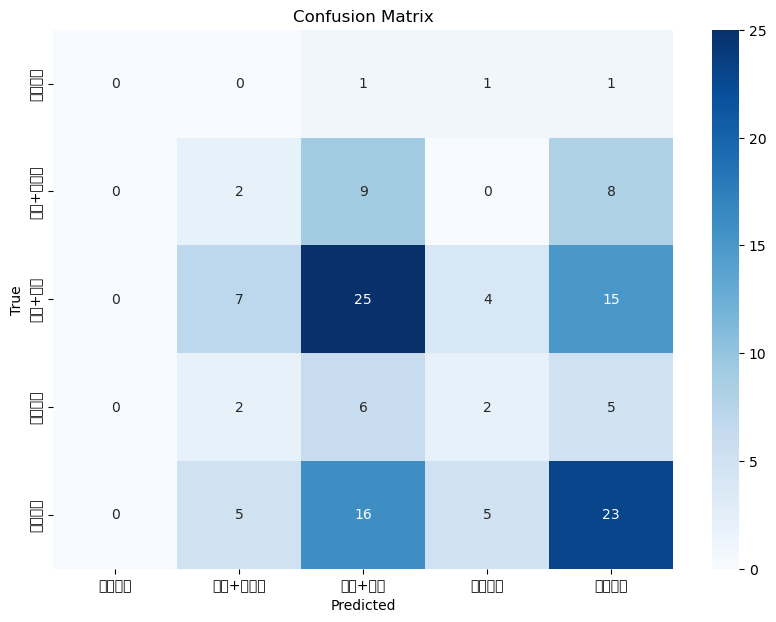

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 予測を実行
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# 混同行列の生成
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 各クラスごとの精度を含むレポートの表示
class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(class_report)

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [195]:
#class_reportをファイルに出力
with open('class_report.txt', 'w') as f:
    f.write(class_report)



'              precision    recall  f1-score   support\n\n        提示なし       0.00      0.00      0.00         3\n      画像+報知音       0.12      0.11      0.11        19\n       画像+音声       0.44      0.49      0.46        51\n        画像のみ       0.17      0.13      0.15        15\n        音声のみ       0.44      0.47      0.46        49\n\n    accuracy                           0.38       137\n   macro avg       0.23      0.24      0.24       137\nweighted avg       0.36      0.38      0.37       137\n'

In [193]:
# !pip install xgboost

In [196]:
# #class_reportをエクセルファイルに出力
# import openpyxl

# # ワークブックを作成
# wb = openpyxl.Workbook()
# ws = wb.active
# ws.title = 'classification_report'

# # classification_reportの内容をセルに書き込む
# for i, line in enumerate(class_report.split('\n')):
#     for j, value in enumerate(line.split()):
#         ws.cell(row=i+1, column=j+1, value=value)

# # ファイルを保存
# wb.save('classification_report.xlsx')

# # ワークブックを閉じる
# wb.close()
